In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import math
from scipy import stats as s
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pandas.tseries.holiday import USFederalHolidayCalendar


In [ ]:

'''
No longer in use
local_data = pd.read_csv('Local_Coffee_data.csv') 
local_data.head()
'''

"\nNo longer in use\nlocal_data = pd.read_csv('Local_Coffee_data.csv') \nlocal_data.head()\n"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
product_count = local_data['Description'].value_counts()
unique_products = local_data['Description'].unique()
print(len(product_count))
print(product_count)
# eliminate the data entries that are uncommon
to_remove = ['Caramel Cake Pop', 'Overnight Oats', 'Egg White Pesto Wrap', 'Pressed Juicery Spicy Greens w Ginger']
local_data.drop(local_data[local_data['Description'].isin(to_remove)].index, inplace = True)
unique_products =  local_data['Description'].unique()
unique_products.sort()
our_products = unique_products[ : 13]
new_local_data = local_data[local_data['Description'].isin(our_products)]
new_local_data.shape
new_local_data.to_csv('local_data_group2.csv ')
'''

"\nproduct_count = local_data['Description'].value_counts()\nunique_products = local_data['Description'].unique()\nprint(len(product_count))\nprint(product_count)\n# eliminate the data entries that are uncommon\nto_remove = ['Caramel Cake Pop', 'Overnight Oats', 'Egg White Pesto Wrap', 'Pressed Juicery Spicy Greens w Ginger']\nlocal_data.drop(local_data[local_data['Description'].isin(to_remove)].index, inplace = True)\nunique_products =  local_data['Description'].unique()\nunique_products.sort()\nour_products = unique_products[ : 13]\nnew_local_data = local_data[local_data['Description'].isin(our_products)]\nnew_local_data.shape\nnew_local_data.to_csv('local_data_group2.csv ')\n"

In [ ]:
#Rafa's call for the data
local_df = pd.read_csv('./drive/MyDrive/local_data_group2_cleaned.csv')
weather = pd.read_csv('./drive/MyDrive/weather_91101_92122.csv')


'''weather['address'] = weather['address'].replace([91101,92122,91105],[18,332,117])
weather.rename(columns={"datetime": "BusinessDate"}, inplace=True)
weather.rename(columns={"address": "StoreID"},inplace=True)
weather'''

for date in weather['datetime'].unique():
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 18), 'temp'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['temp'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 18), 'tempmin'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['tempmin'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 18), 'tempmax'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['tempmax'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 18), 'conditions'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['conditions'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 117), 'temp'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['temp'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 117), 'tempmin'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['tempmin'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 117), 'tempmax'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['tempmax'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 117), 'conditions'] = weather[(weather['datetime'] == date) & (weather['address'] == 91101)]['conditions'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 332), 'temp'] = weather[(weather['datetime'] == date) & (weather['address'] == 92122)]['temp'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 332), 'tempmin'] = weather[(weather['datetime'] == date) & (weather['address'] == 92122)]['tempmin'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 332), 'tempmax'] = weather[(weather['datetime'] == date) & (weather['address'] == 92122)]['tempmax'].values[0]
    local_df.loc[(local_df['BusinessDate'] == date) & (local_df['StoreID'] == 332), 'conditions'] = weather[(weather['datetime'] == date) & (weather['address'] == 92122)]['conditions'].values[0]
local_df.head(13)

#local_df = local_df.merge(weather ,on = ['BusinessDate','StoreID'])


,StoreID,BusinessDate,Description,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales,temp,tempmin,tempmax,conditions
0,18,2019-06-29,Caprese Sandwich,Cold Case,Ready to Eat,4.0,1.0,4.0,9,0,0.000000,71.3,59.6,83.3,Clear
1,18,2019-06-29,Breakfast Burrito Egg Beans & Rice,Cold Case,Ready to Eat,1.0,2.0,1.0,21,0,0.000000,71.3,59.6,83.3,Clear
2,18,2019-06-29,Everything Bagel,Bake Case,Bagels,6.0,4.0,0.0,16,0,0.000000,71.3,59.6,83.3,Clear
3,18,2019-06-29,Blueberry Scone,Bake Case,Muffins & Scones,8.0,6.0,0.0,16,0,0.000000,71.3,59.6,83.3,Clear
4,18,2019-06-29,Butter Croissant,Bake Case,Pastries,8.0,7.0,0.0,15,1,0.618387,71.3,59.6,83.3,Clear
5,18,2019-06-29,Chocolate Croissant,Bake Case,Pastries,10.0,3.0,0.0,18,0,0.000000,71.3,59.6,83.3,Clear
6,18,2019-06-29,Cinnamon Roll,Bake Case,Pastries,6.0,2.0,0.0,12,0,0.000000,71.3,59.6,83.3,Clear
7,18,2019-06-29,Cookie - Chocolate Chunk,Bake Case,Cookies & Bars,2.0,1.0,0.0,15,1,0.738732,71.3,59.6,83.3,Clear
8,18,2019-06-29,Egg| Spinach & Cheddar Sandwich on Ciabatta,Cold Case,Ready to Eat,4.0,3.0,4.0,9,0,0.000000,71.3,59.6,83.3,Clear
9,18,2019-06-29,Danish - Classic Cheese,Bake Case,Pastries,8.0,4.0,0.0,19,0,0.000000,71.3,59.6,83.3,Clear


In [ ]:
local_df['conditions'].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy', 'Rain',
       'Overcast'], dtype=object)

# Data Visualization

### Box Plots

##### Product Statistics

##### Inventory Patterns

##### Stock out Patterns

##### Missed Sales

### Best Seller / Worst Seller of top 25% and bottom 25% 

### Best and worst product based on inventory management

### Identify stock outs and estiomate the loss of sales per year per product 

### Show graphically how the product sales and waste change 

##### Impact of the day of the week on sales

##### Monthly changes and patterns 

##### Impact of weather condition based on two factors

### Investigate wheter drive thru feature causes  ceratain products to sell better or worse

### Impact of weekday/weekend or National Holidays 

### Identify stocking patterns across multiple stores

### Conclusions

## Data Cleaning

In [ ]:
'''
# we can get rid of Category1 because if is all food
local_df.drop('CategoryLvl1Desc', 1,  inplace=True)
# droping group ID because 'not applicable'
local_df.drop('GroupID', 1, inplace=True)
# this is a binary value
local_df['StockedOut'].unique()
local_df.drop('ItemType', 1, inplace=True)
local_df.drop('PLU', 1, inplace=True)
# checking for any null values in the df
local_df[local_df.isnull().any(axis=1)]
# there appears to only be NaN values in the Missed Sales Column
# replace all of the NaNs in missed sales with the value 0 
local_df['MissedSales'] = local_df['MissedSales'].fillna(0.0)
local_df.isnull().values.any()
 # might want to change this later just to be an average
 '''

"\n# we can get rid of Category1 because if is all food\nlocal_df.drop('CategoryLvl1Desc', 1,  inplace=True)\n# droping group ID because 'not applicable'\nlocal_df.drop('GroupID', 1, inplace=True)\n# this is a binary value\nlocal_df['StockedOut'].unique()\nlocal_df.drop('ItemType', 1, inplace=True)\nlocal_df.drop('PLU', 1, inplace=True)\n# checking for any null values in the df\nlocal_df[local_df.isnull().any(axis=1)]\n# there appears to only be NaN values in the Missed Sales Column\n# replace all of the NaNs in missed sales with the value 0 \nlocal_df['MissedSales'] = local_df['MissedSales'].fillna(0.0)\nlocal_df.isnull().values.any()\n # might want to change this later just to be an average\n "

### Separate Into individual df

In [ ]:
# creating dataframes for each individual store
store18 = local_df[local_df['StoreID'] == 18]
store117 = local_df[local_df['StoreID'] == 117]
store332 = local_df[local_df['StoreID'] == 332]
#store18.to_csv('store18.csv', index=False)
#store117.to_csv('store117.csv', index=False)
#store332.to_csv('store332.csv', index=False)

## Box Plots

#### Product Statistics


In [ ]:
def item_statistics(df):

    namesMainData = df['Description'].unique()
    store_ID = df['StoreID'].unique()[0]

    for name in namesMainData:
        plt.title(f"StoreID: {store_ID} Average Sold Quantity for {name}")
        data = [df.loc[df['Description'] == name]['SoldQuantity'], df.loc[df['Description'] == name]['EndQuantity'], df.loc[df['Description'] == name]['StockedOut'], df.loc[df['Description'] == name]['MissedSales']]

        plt.boxplot(data)
        bars = (' ', 'SoldQuantity', 'EndQuantity', 'StockedOut', 'MissedSales' )
        y_pos = np.arange(len(bars) )
        plt.xticks(y_pos, bars, fontsize='10' , rotation=90, horizontalalignment='left')
        plt.show()
        print()




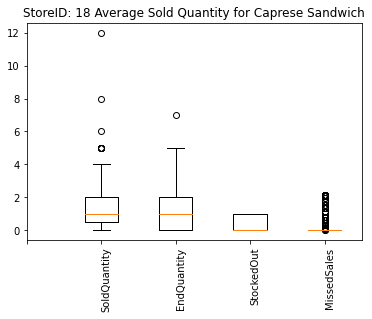

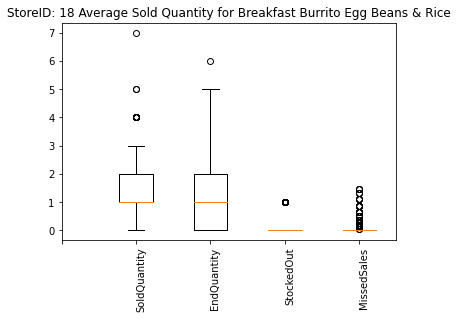

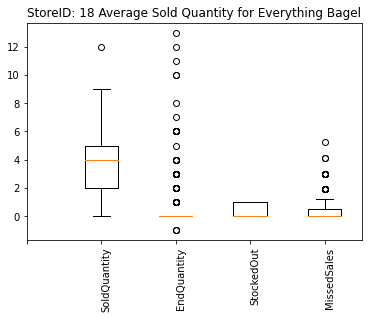

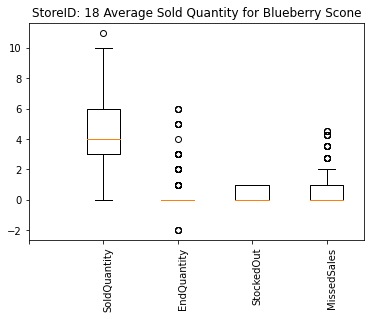

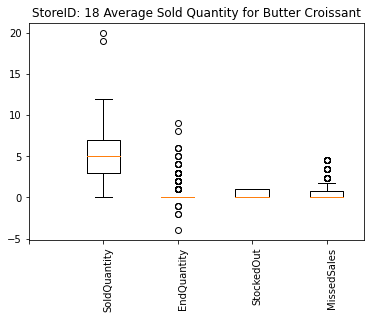

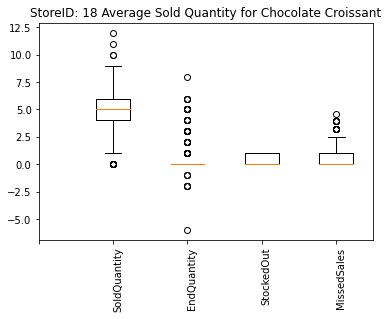

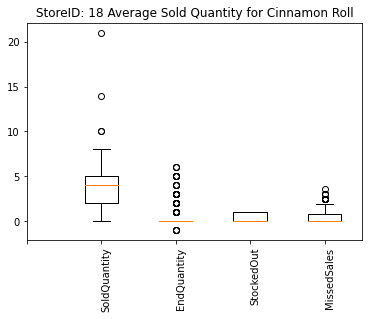

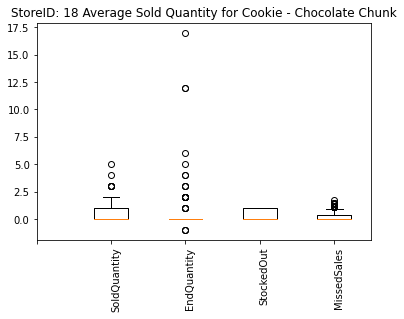

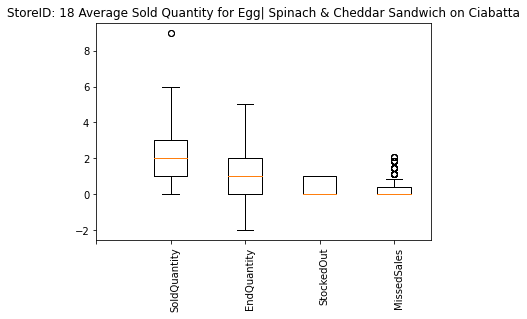

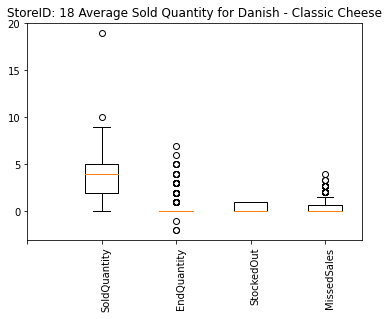

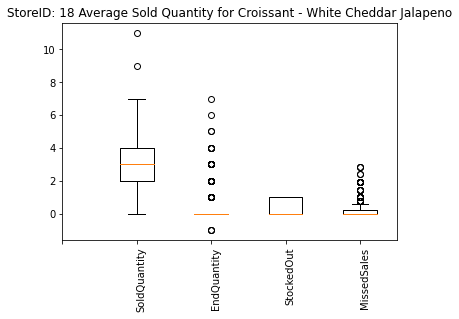

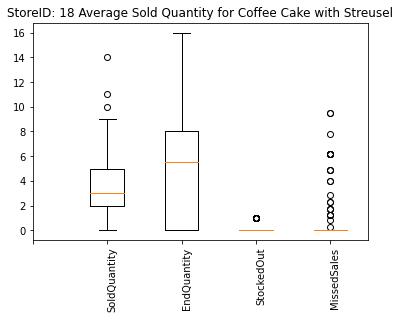

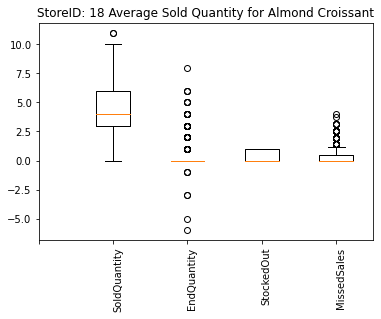

In [ ]:
item_statistics(store18)

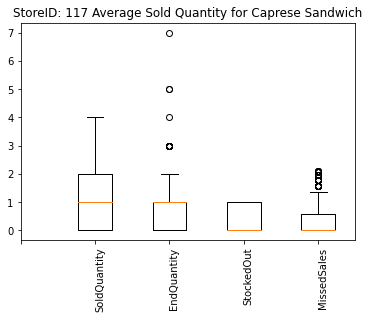

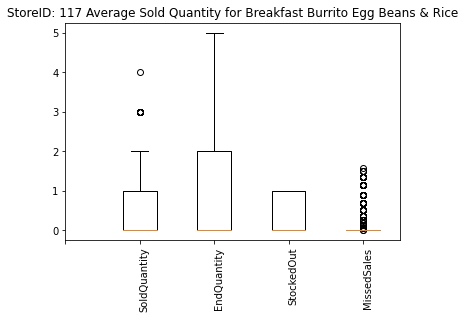

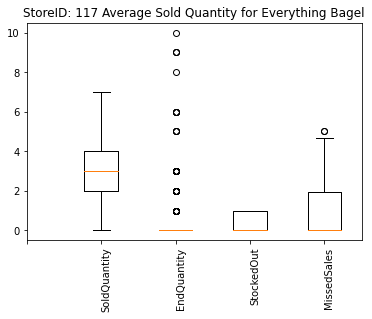

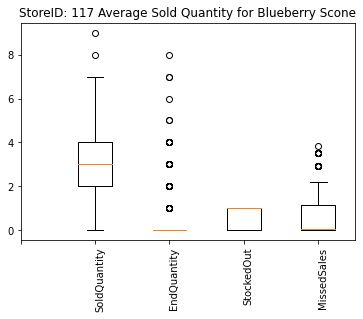

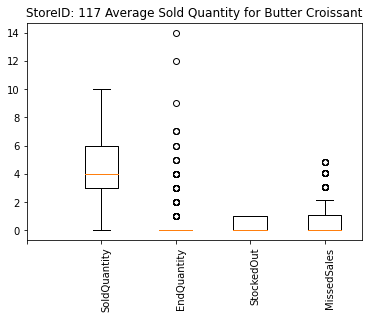

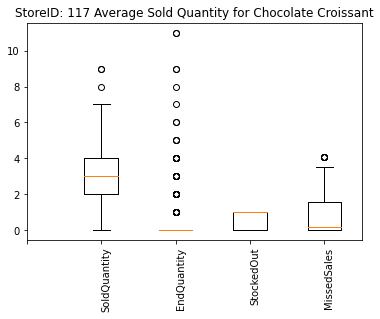

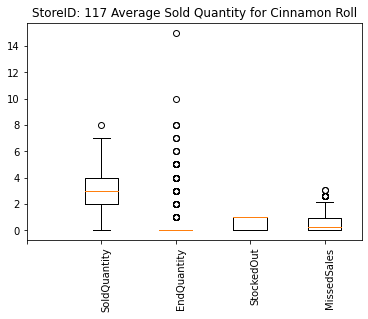

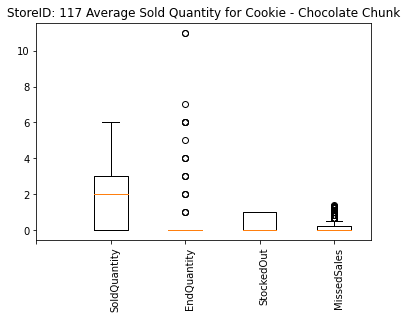

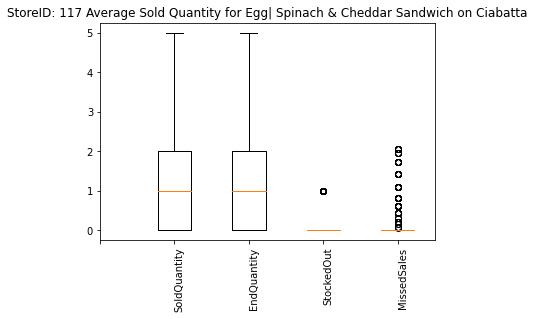

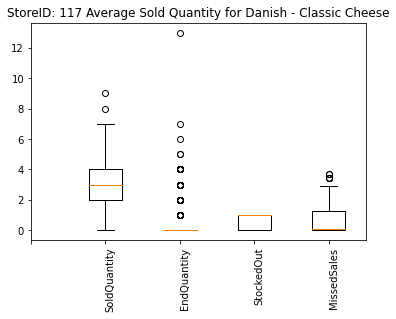

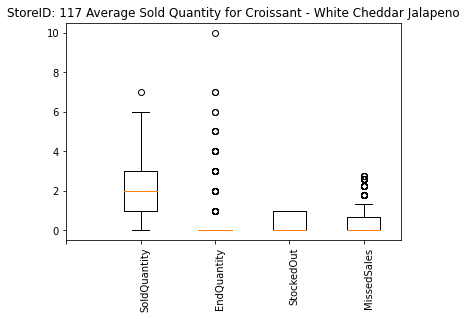

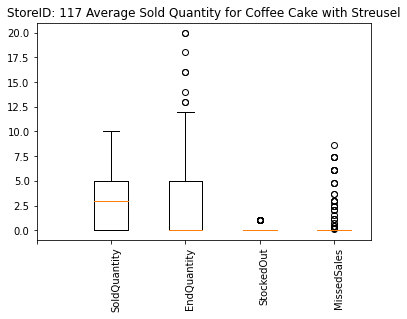

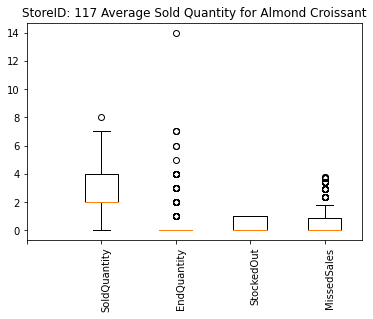

In [ ]:
item_statistics(store117)

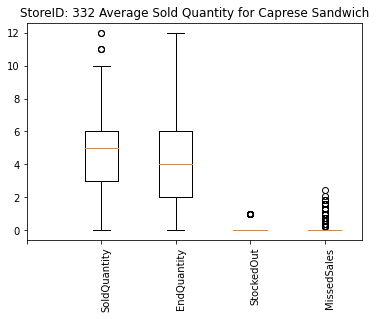

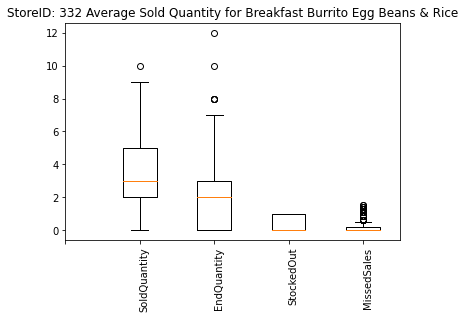

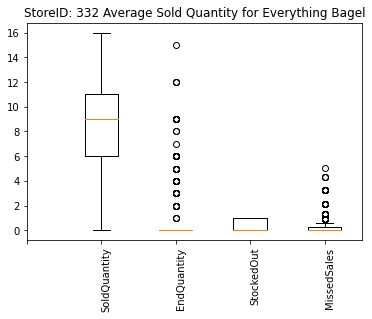

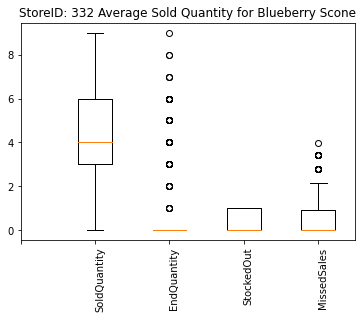

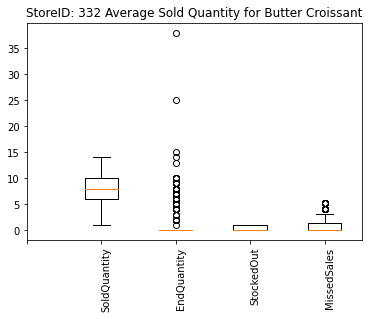

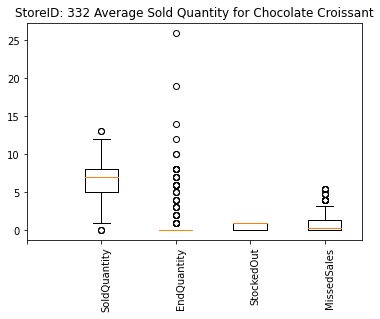

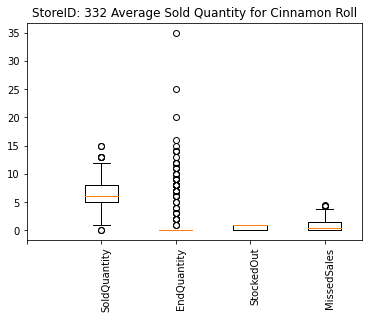

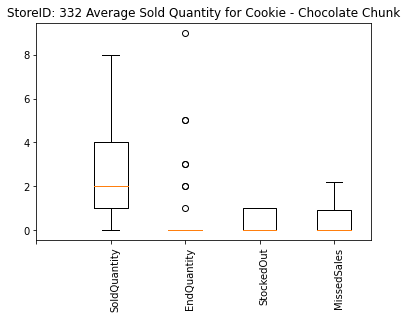

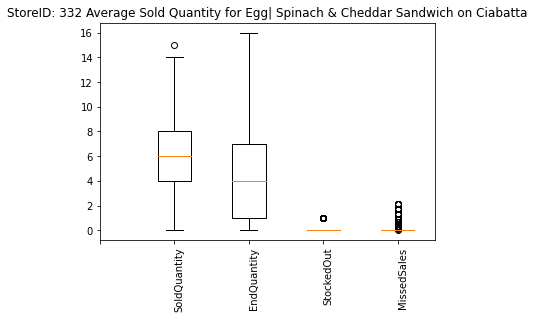

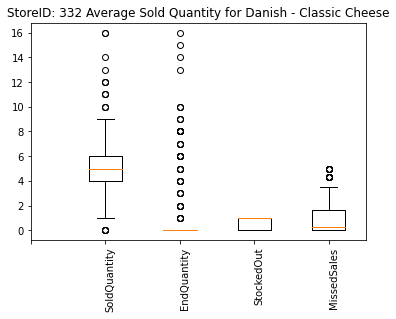

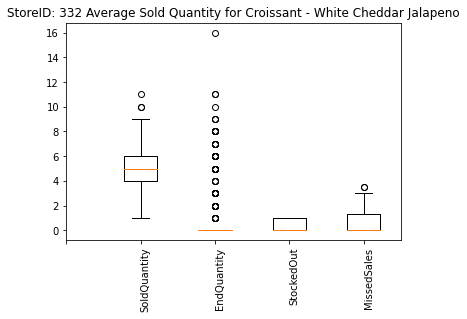

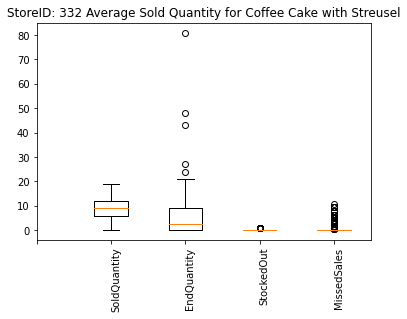

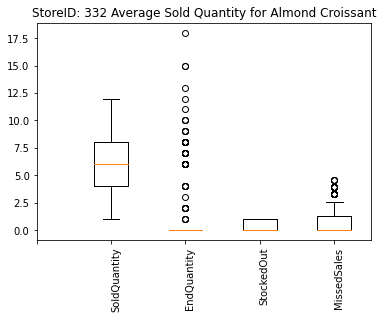

In [ ]:
item_statistics(store332)

## Best Seller / Worst Seller of top 25% and bottom 25%

In [ ]:
def best_and_worst_seller(df):
    averageSold = []
    store_ID = df['StoreID'].unique()[0]
    namesMainData = df['Description'].unique()
    
    for name in namesMainData:
        averageSold.append([name, df.loc[df['Description'] == name]['SoldQuantity'].mean() * 3])
    for n in range(len(averageSold)-1, 0, -1):
        for i in range(n):
            if averageSold[i][1] < averageSold[i + 1][1]:
                averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

    topTwentyFive = round((len(averageSold)/4))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Top 25% Selling Items StoreID: {store_ID}")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Sales $')
    for i in range(0, topTwentyFive):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()

    print()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Worst 25% Selling Items StoreID: {store_ID}")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Sales $')
    for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()



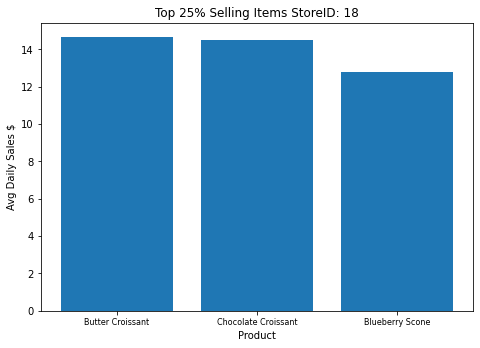

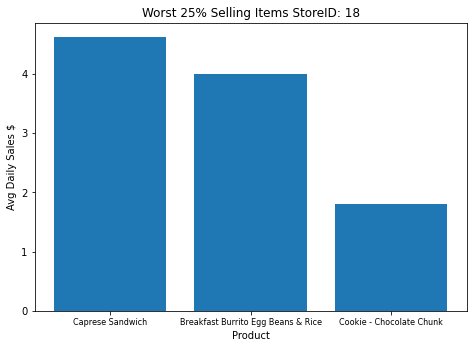

In [ ]:
best_and_worst_seller(store18)

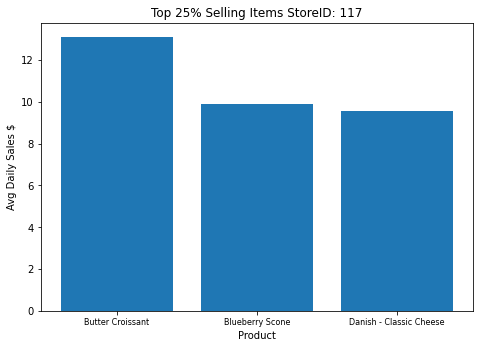

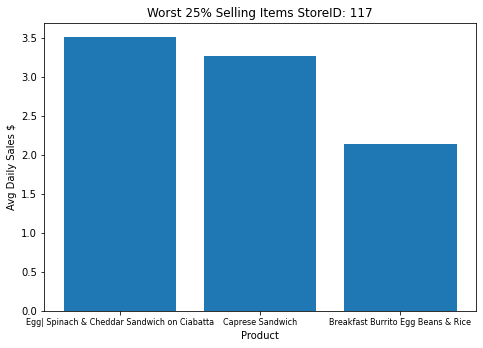

In [ ]:
best_and_worst_seller(store117)

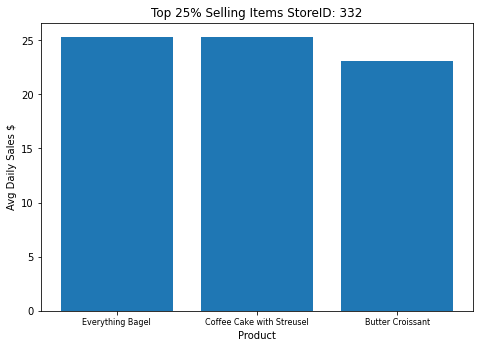

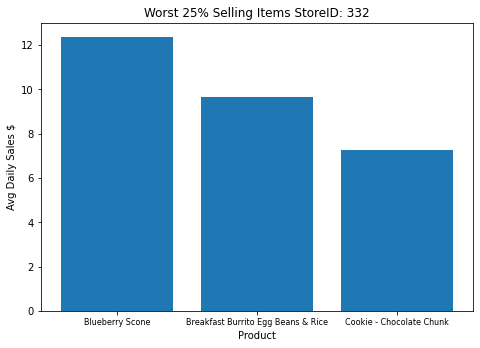

In [ ]:
best_and_worst_seller(store332)

## Best and worst product based on inventory management

In [ ]:
def best_and_worst_inventory_management(df):

    store_ID = df['StoreID'].unique()[0]
    averageSold = []
    for name in df['Description'].unique():
        averageSold.append([name,  (df.loc[df['Description'] == name]['SoldQuantity'].mean() * 3 - df.loc[df['Description'] == name]['ReceivedQuantity'].mean() * .5)])


    for n in range(len(averageSold)-1, 0, -1):
        for i in range(n):
            if averageSold[i][1] < averageSold[i + 1][1]:
                averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

    topTwentyFive = round((len(averageSold)/4))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Top 25% Managed Items StoreID: {store_ID}")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Profit After Unsold Loss')
    for i in range(0, topTwentyFive):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='9')
    plt.show()
    print()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Worst 25% Managed Items StoreID: {store_ID}")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Profit  After Unsold Loss')
    for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()



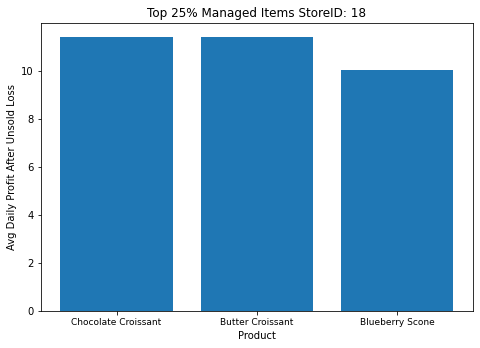

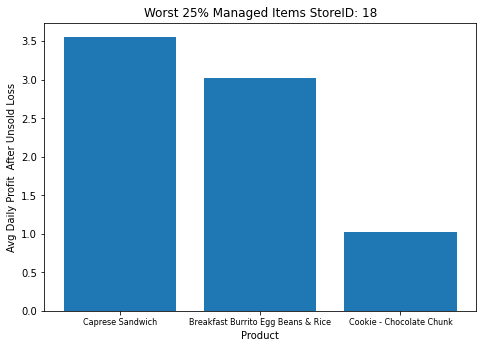

In [ ]:
best_and_worst_inventory_management(store18)

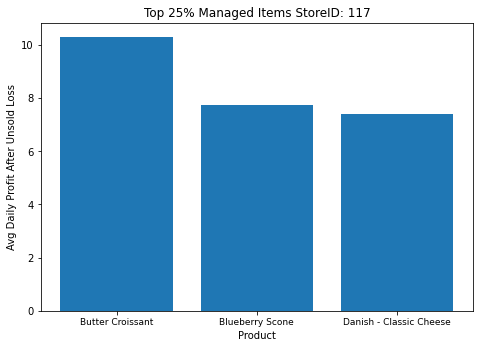

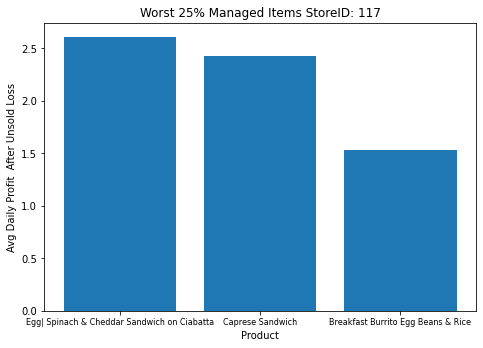

In [ ]:
best_and_worst_inventory_management(store117)

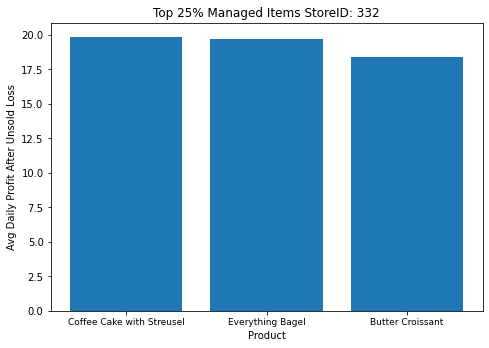

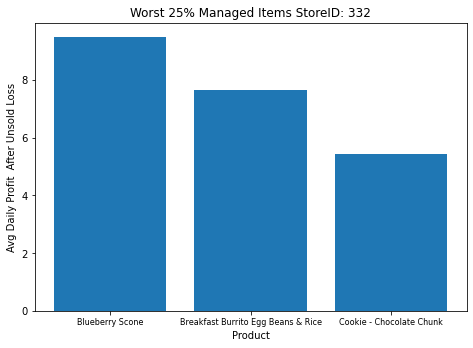

In [ ]:
best_and_worst_inventory_management(store332)

## Identify stock outs and estimate the loss of sales per year per product

In [ ]:
def loss_sales_from_stock_out(df):
    all_products = df['Description'].unique()
    stockout_dict = dict()
    lost_sales_dict = dict()

    for product in all_products:
        stockout_dict[product] = df[(df['Description'] == product) & (df['StockedOut'] == 1)]

    product_sales_avg = dict()
    for product in all_products:
        product_sales_avg[product] = df[(df['Description'] == product)]['SoldQuantity'].mean()
    
    barrier_date =  '2019-06-29'.split('-')
    barrier_date = datetime(int(barrier_date[0]), int(barrier_date[1]), int(barrier_date[2]))

    for product in all_products:
        lost_sales_dict[product] = 0
        for outstock_day in stockout_dict[product]['BusinessDate']:
        # converting date to python date
            outstock_date =  outstock_day.split('-')
            outstock_date = datetime(int(outstock_date[0]), int(outstock_date[1]), int(outstock_date[2]))
            total = 0
            for i in range(4, 0, -1 ):
                date = outstock_date
                # currentDate = str(date)[:10]
                week_ago =  date - timedelta(days=(7*i))
                last_week_date = str(week_ago)[:10]
                if week_ago < barrier_date:
                # we are beyond the barrier therefore total will be whole item average
                    total = product_sales_avg[product] * 4
                    break
                week_ago_value = (df[(df['Description'] == product) & (df['BusinessDate'] == last_week_date)])['SoldQuantity'].values
                if len(week_ago_value) == 0:
                    total += 0
                else:
                    total += week_ago_value[0]
            lost_sales_dict[product] += (total / 4) * .75



    #print out the results
    for key, value in lost_sales_dict.items():
        print(f'{key}: {value:.2f}')
        



In [ ]:
loss_sales_from_stock_out(store18)

Caprese Sandwich: 105.25
Breakfast Burrito Egg Beans & Rice: 80.62
Everything Bagel: 370.51
Blueberry Scone: 588.41
Butter Croissant: 599.17
Chocolate Croissant: 632.74
Cinnamon Roll: 463.49
Cookie - Chocolate Chunk: 44.04
Egg| Spinach & Cheddar Sandwich on Ciabatta: 197.62
Danish - Classic Cheese: 471.10
Croissant - White Cheddar Jalapeno: 296.08
Coffee Cake with Streusel: 62.06
Almond Croissant: 507.92


In [ ]:
loss_sales_from_stock_out(store117)

Caprese Sandwich: 99.15
Breakfast Burrito Egg Beans & Rice: 51.26
Everything Bagel: 366.51
Blueberry Scone: 528.44
Butter Croissant: 602.45
Chocolate Croissant: 448.53
Cinnamon Roll: 507.84
Cookie - Chocolate Chunk: 178.51
Egg| Spinach & Cheddar Sandwich on Ciabatta: 74.51
Danish - Classic Cheese: 460.99
Croissant - White Cheddar Jalapeno: 259.48
Coffee Cake with Streusel: 92.90
Almond Croissant: 323.53


In [ ]:
loss_sales_from_stock_out(store332)

Caprese Sandwich: 172.29
Breakfast Burrito Egg Beans & Rice: 235.84
Everything Bagel: 705.73
Blueberry Scone: 477.69
Butter Croissant: 926.65
Chocolate Croissant: 916.98
Cinnamon Roll: 922.50
Cookie - Chocolate Chunk: 297.92
Egg| Spinach & Cheddar Sandwich on Ciabatta: 353.38
Danish - Classic Cheese: 707.37
Croissant - White Cheddar Jalapeno: 645.20
Coffee Cake with Streusel: 330.28
Almond Croissant: 780.49


## Impact of day of the week on sales and stocks

In [ ]:
from pandas.core.frame import DataFrame

def day_of_week_impact(df):

    store_ID = df['StoreID'].unique()[0]
    dailySalesStock = []
    namesMainData = df['Description'].unique()
    for name in namesMainData:
        dayStocks = [0,0,0,0,0,0,0]
        daySales = [0,0,0,0,0,0,0]
        for date in df.loc[df['Description'] == name]['BusinessDate'].unique():
            sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
            dayStocks[sdate.weekday()] = (dayStocks[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())/2
            daySales[sdate.weekday()] = (daySales[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())/2
        dailySalesStock.append([name, dayStocks, daySales])  

    """ for item in dailySalesStock:
        percent_list = []
        for i in range(len(item[1])):
            percentage = item[2][i]/item[1][i]
            percent_list.append(percentage)
    
        plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],percent_list)
        plt.title(item[0])
        plt.show()
        ## working on making the percentage bars maybe we can see how to determine restocking patterns based 
        ## on the percentage of sold/stock value

        ## is end quantity accurate? some values have received quant equal to end quant even though there were sales. """
    for item in dailySalesStock:
    # print(item)
        data = [item[1], item[2]]
        X = np.arange(7)
        fig = plt.figure()

        ax = fig.add_axes([0,0,1,1])
        ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
        ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
        ax.legend(labels=['Stock', 'Sold'])
        plt.xticks(X, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

        plt.title(f"StoreID {store_ID} {item[0]} Specific Day Sales")
        plt.xlabel('Day')
        plt.ylabel('Item Amount')
        fig = plt.figure()
        print()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


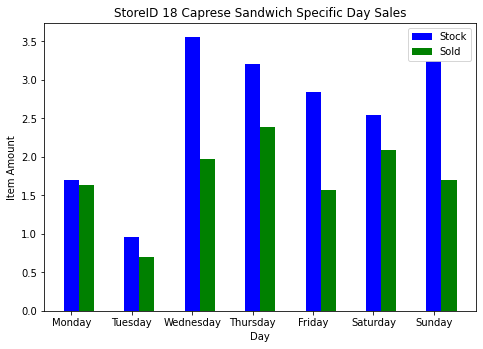

<Figure size 432x288 with 0 Axes>

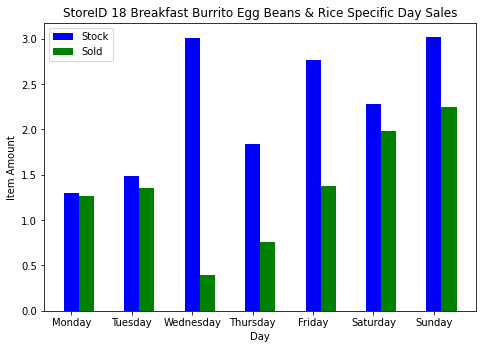

<Figure size 432x288 with 0 Axes>

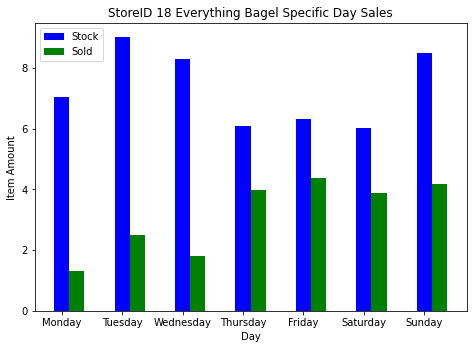

<Figure size 432x288 with 0 Axes>

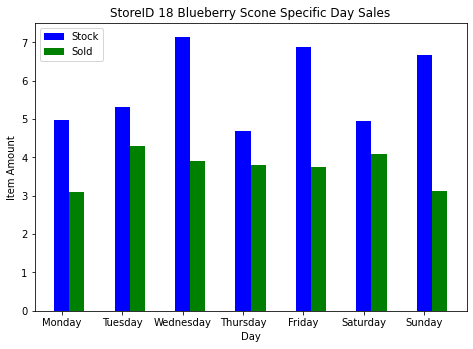

<Figure size 432x288 with 0 Axes>

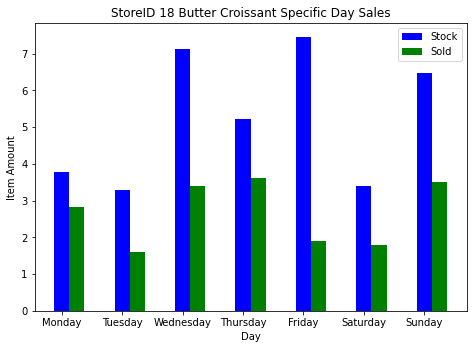

<Figure size 432x288 with 0 Axes>

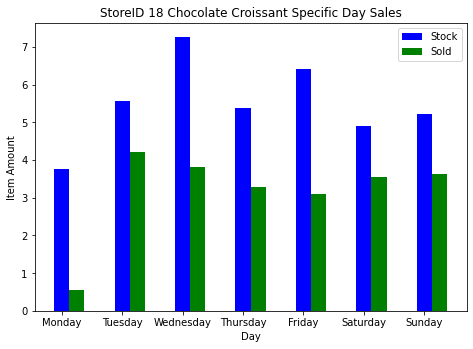

<Figure size 432x288 with 0 Axes>

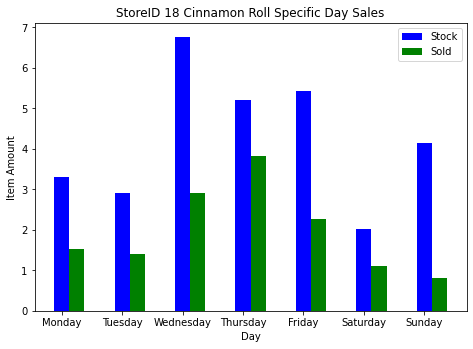

<Figure size 432x288 with 0 Axes>

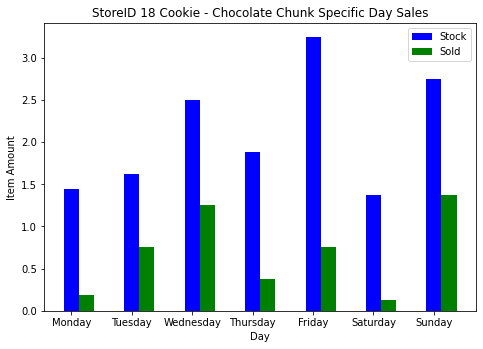

<Figure size 432x288 with 0 Axes>

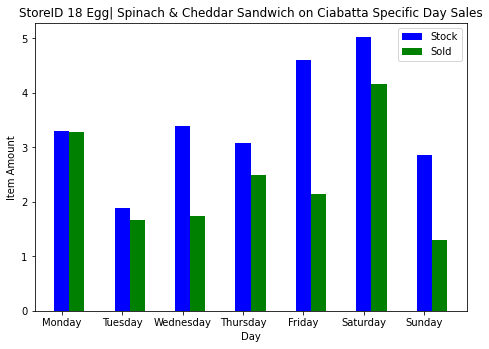

<Figure size 432x288 with 0 Axes>

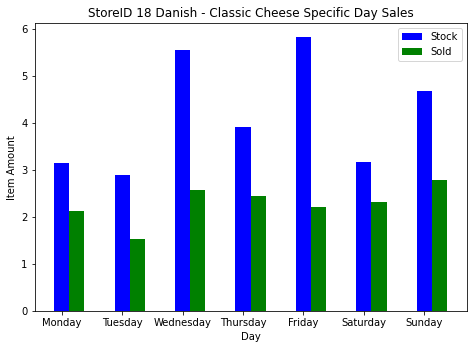

<Figure size 432x288 with 0 Axes>

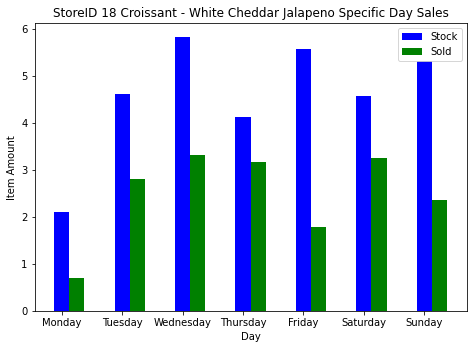

<Figure size 432x288 with 0 Axes>

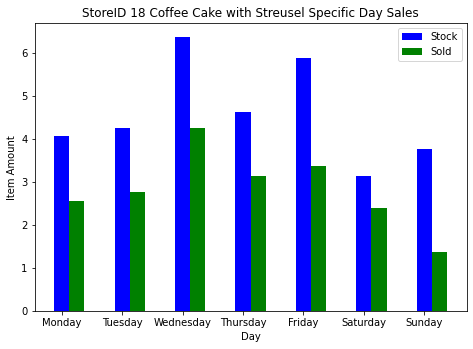

<Figure size 432x288 with 0 Axes>

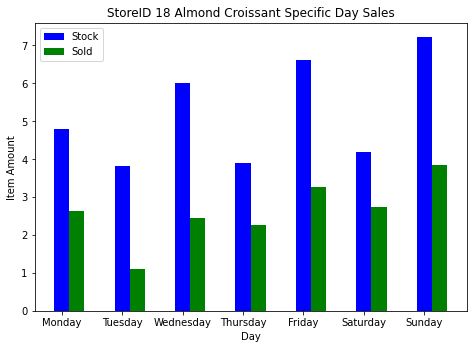

<Figure size 432x288 with 0 Axes>

In [ ]:
day_of_week_impact(store18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


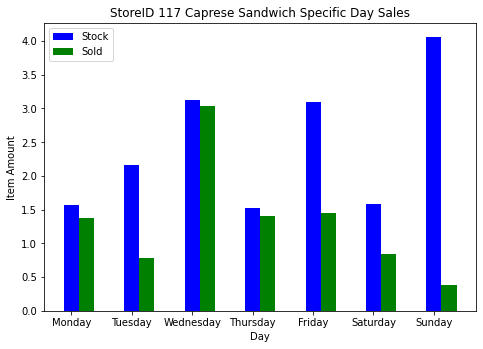

<Figure size 432x288 with 0 Axes>

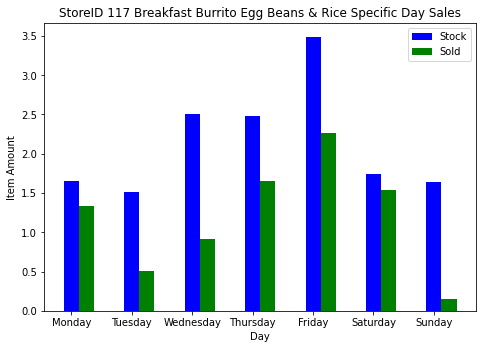

<Figure size 432x288 with 0 Axes>

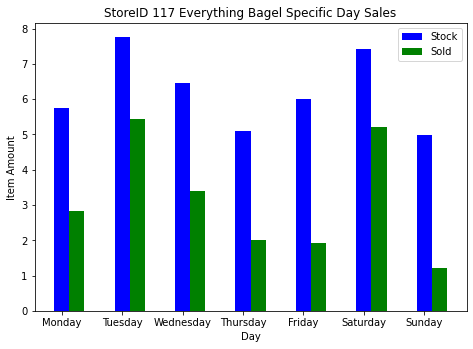

<Figure size 432x288 with 0 Axes>

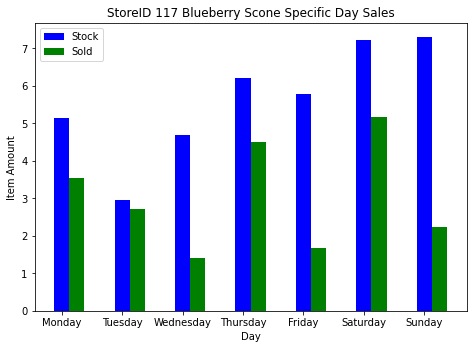

<Figure size 432x288 with 0 Axes>

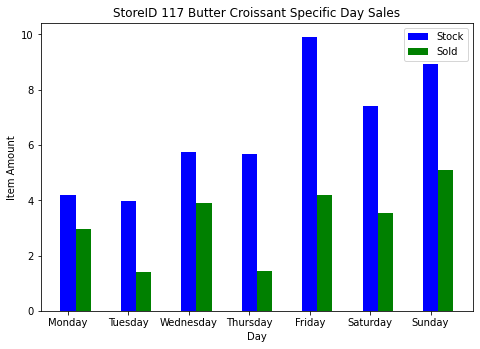

<Figure size 432x288 with 0 Axes>

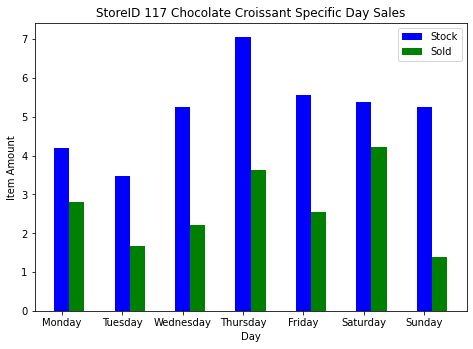

<Figure size 432x288 with 0 Axes>

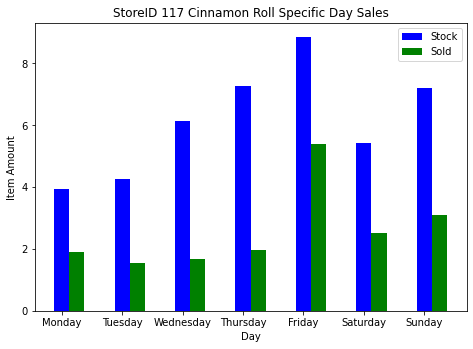

<Figure size 432x288 with 0 Axes>

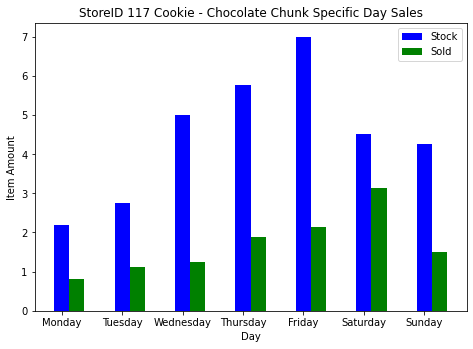

<Figure size 432x288 with 0 Axes>

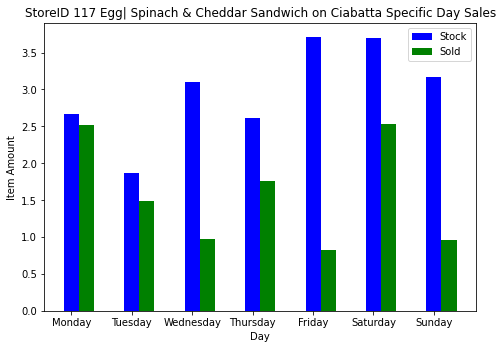

<Figure size 432x288 with 0 Axes>

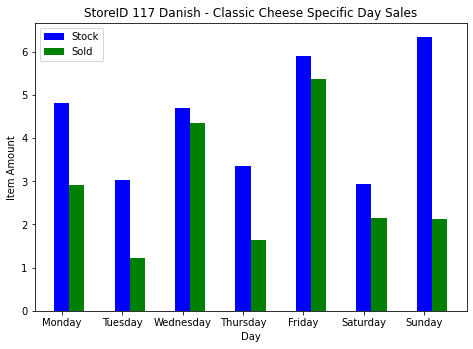

<Figure size 432x288 with 0 Axes>

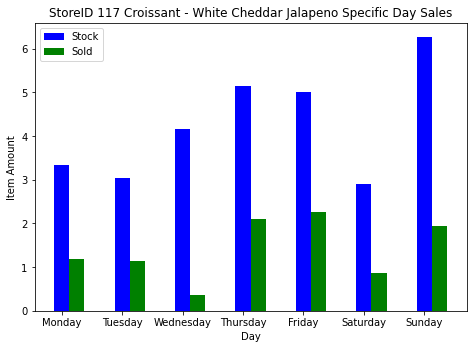

<Figure size 432x288 with 0 Axes>

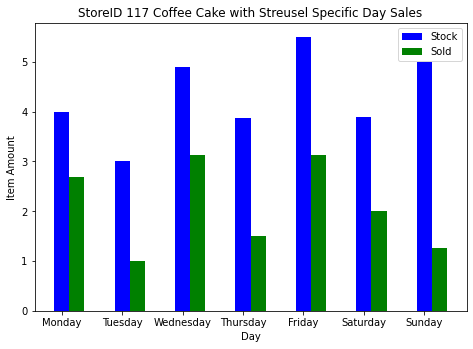

<Figure size 432x288 with 0 Axes>

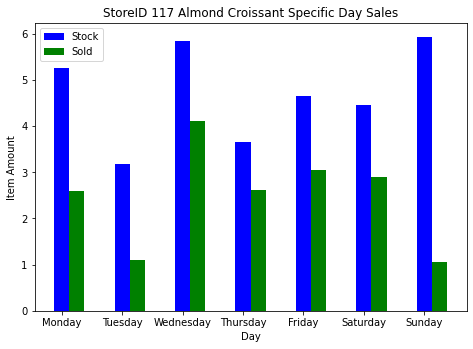

<Figure size 432x288 with 0 Axes>

In [ ]:
day_of_week_impact(store117)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


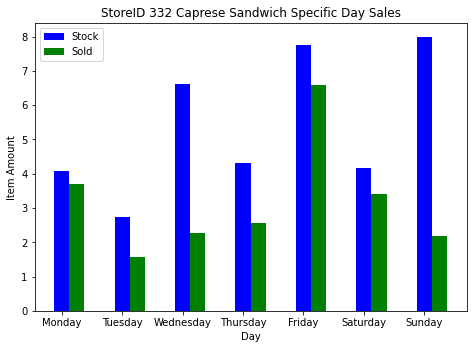

<Figure size 432x288 with 0 Axes>

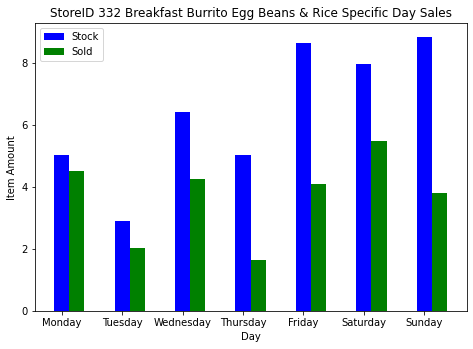

<Figure size 432x288 with 0 Axes>

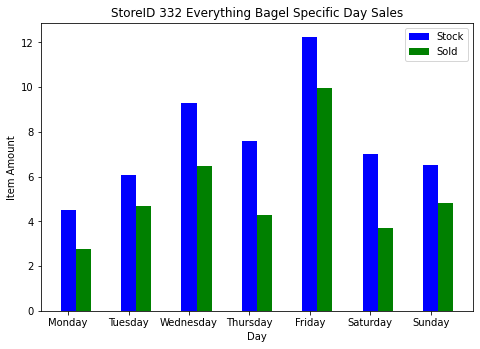

<Figure size 432x288 with 0 Axes>

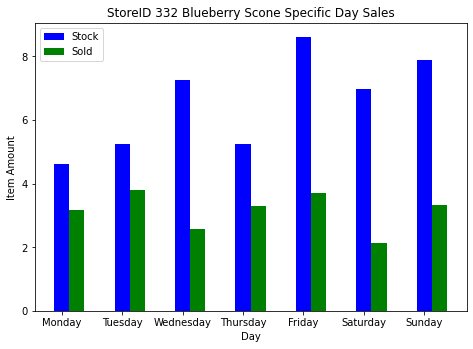

<Figure size 432x288 with 0 Axes>

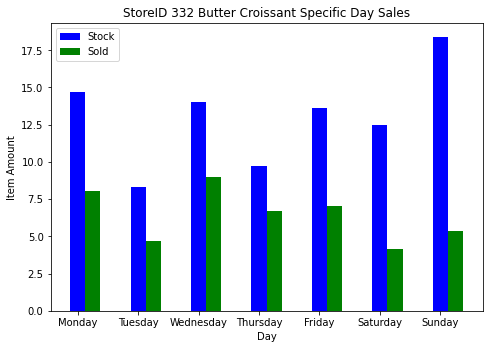

<Figure size 432x288 with 0 Axes>

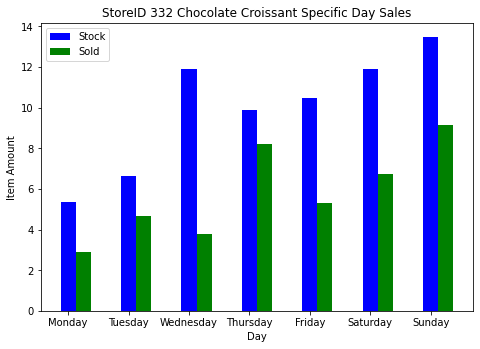

<Figure size 432x288 with 0 Axes>

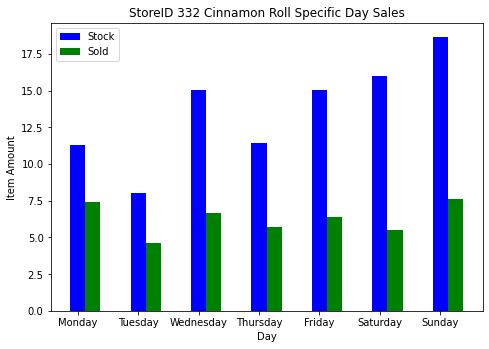

<Figure size 432x288 with 0 Axes>

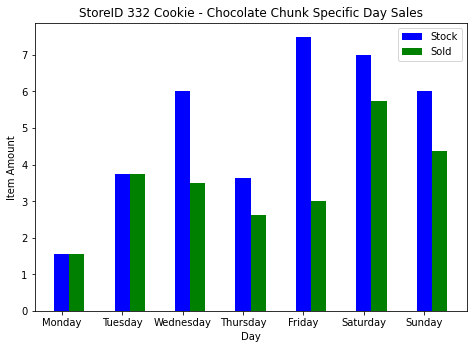

<Figure size 432x288 with 0 Axes>

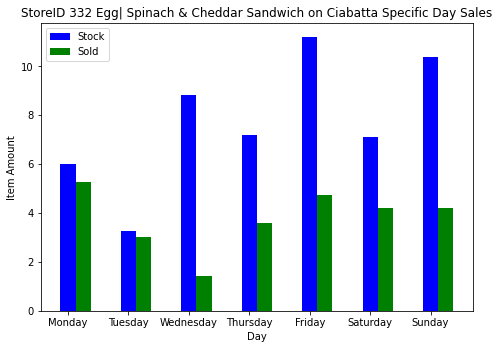

<Figure size 432x288 with 0 Axes>

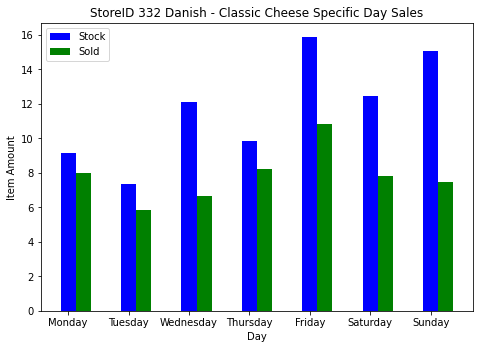

<Figure size 432x288 with 0 Axes>

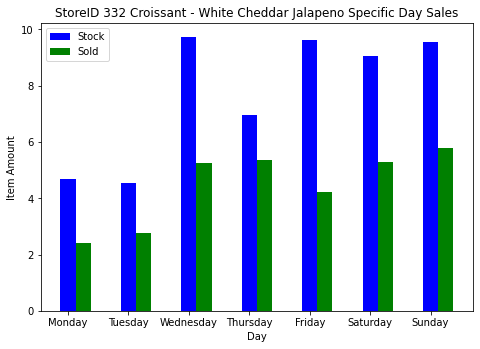

<Figure size 432x288 with 0 Axes>

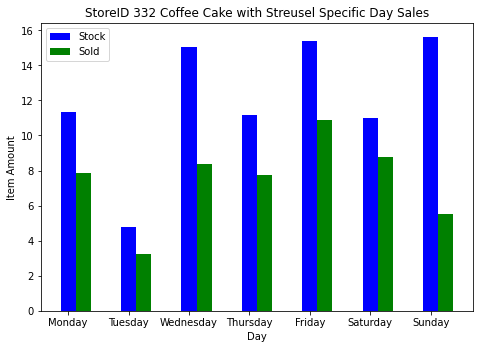

<Figure size 432x288 with 0 Axes>

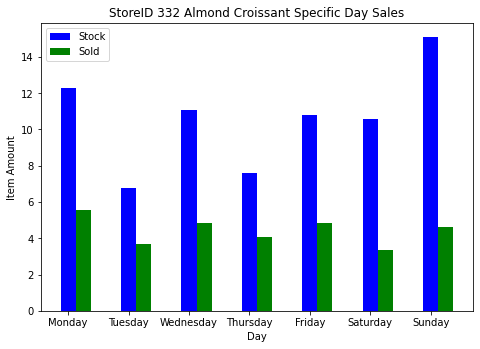

<Figure size 432x288 with 0 Axes>

In [ ]:
day_of_week_impact(store332)

# Monthly changes


In [ ]:
def monthly_patterns(df):
    itemmonths = []

    for date in df['BusinessDate'].unique():
        year = date.split('-')[0]
        month =  date.split('-')[1]
    
        if([month, year] not in itemmonths):
            itemmonths.append([month, year])

    monthlyStockData = []
    for name in df['Description'].unique():
        monthlyData = []
        for month in itemmonths:
            thisMonthSales = 0
            thisMonthStocks = 0
            sdate = datetime(int(month[1]), int(month[0]), 1) 
            edate = sdate + relativedelta(months=1)
            delta = edate - sdate   # returns timedelta
            for i in range(delta.days + 1):
                day = sdate + timedelta(days=i)
                thisMonth = str(day.month)
                thisDay = str(day.day)
                dayStocks = [0,0,0,0,0,0,0]
                daySales = [0,0,0,0,0,0,0]

                if(len(thisMonth) == 1):
                    thisMonth = "0" + str(day.month)
                
                if(len(thisDay) == 1):
                    thisDay = "0" + str(day.day)

                currentDate = str(day.year) + "-" +  str(thisMonth) + "-" + str(thisDay)
                if(df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].empty == False):
                    thisMonthStocks += (dayStocks[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['EndQuantity'].mean())/2
                    thisMonthSales += (daySales[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].mean())/2
            monthlyData.append([month, thisMonthStocks, thisMonthSales])
        monthlyStockData.append([name, monthlyData])

    for item in monthlyStockData:
        datas1 = []
        datas2 = []
        for i in item[1]:
            datas1.append(i[1])
            datas2.append(i[2])
        data = [datas1, datas2]
        X = np.arange(len(datas2))
        fig = plt.figure()

        ax = fig.add_axes([0,0,1,1])
        ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
        ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
        ax.legend(labels=['Stock', 'Sold'])
        axisTicks = ()
        for i in item[1]:
            titleDate = i[0][0] + "/" + i[0][1]
            axisTicks = axisTicks + (titleDate,)

        plt.xticks(X, (axisTicks))

        plt.title(item[0] +" Specific Month Sales")
        plt.xlabel('Month')
        plt.ylabel('Item Amount')
        plt.xticks(fontsize='10' , rotation=90)

        fig = plt.figure()
        print()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


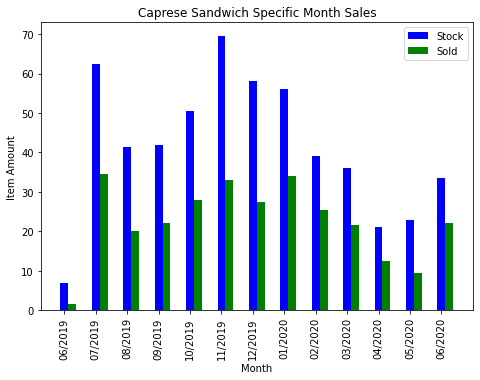

<Figure size 432x288 with 0 Axes>

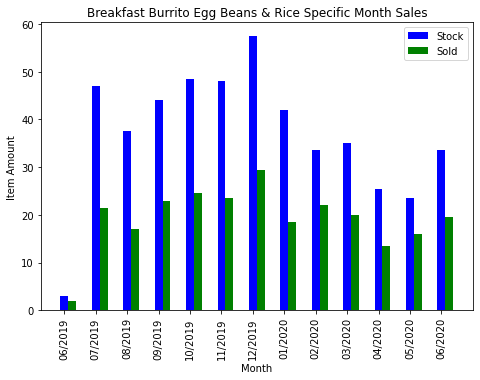

<Figure size 432x288 with 0 Axes>

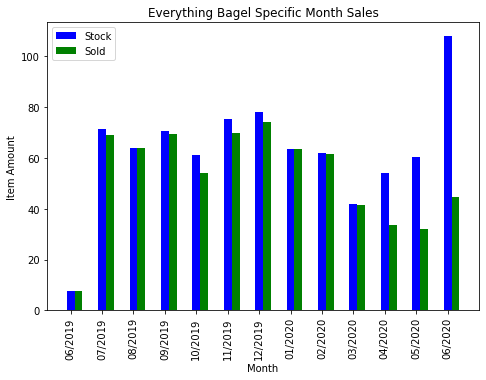

<Figure size 432x288 with 0 Axes>

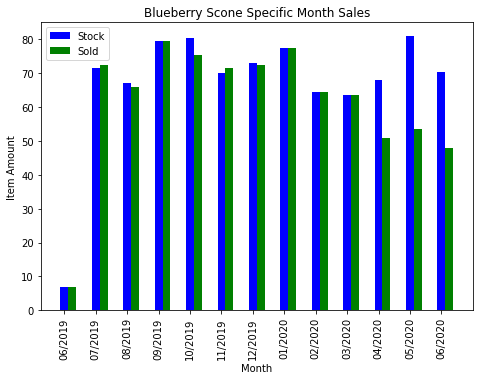

<Figure size 432x288 with 0 Axes>

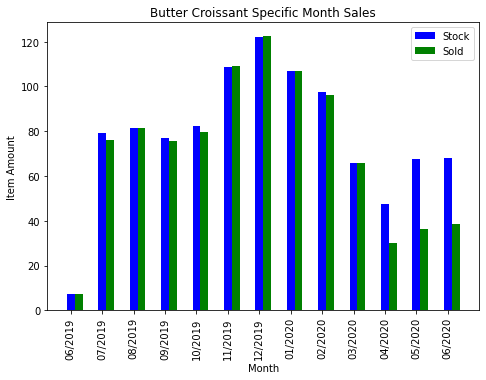

<Figure size 432x288 with 0 Axes>

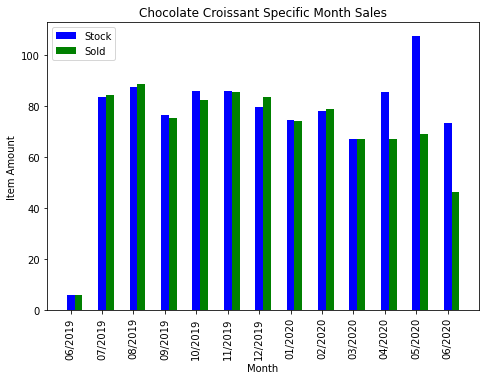

<Figure size 432x288 with 0 Axes>

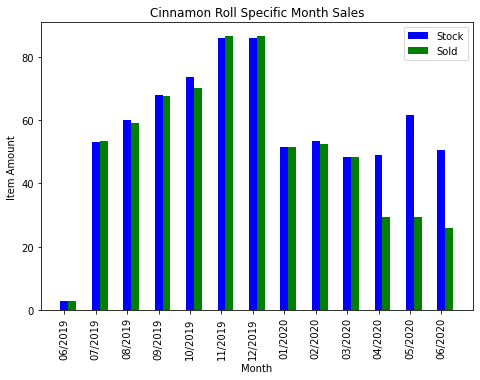

<Figure size 432x288 with 0 Axes>

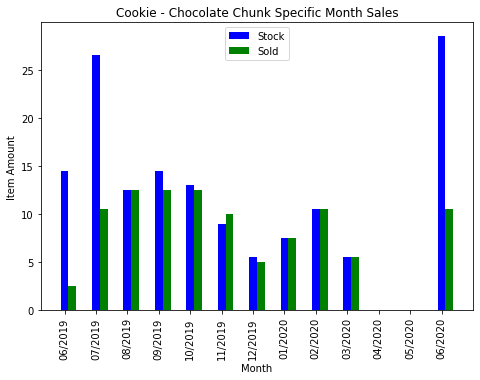

<Figure size 432x288 with 0 Axes>

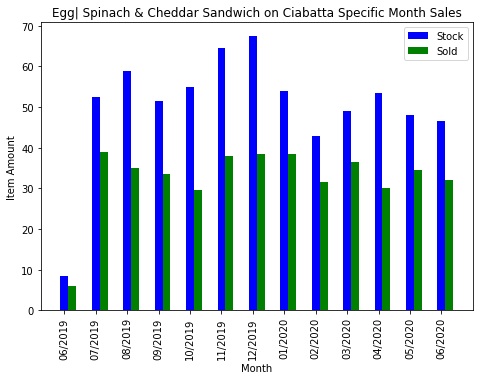

<Figure size 432x288 with 0 Axes>

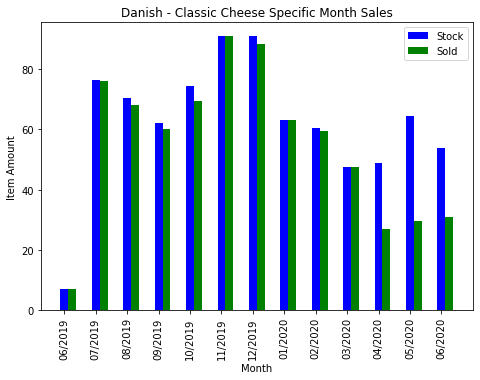

<Figure size 432x288 with 0 Axes>

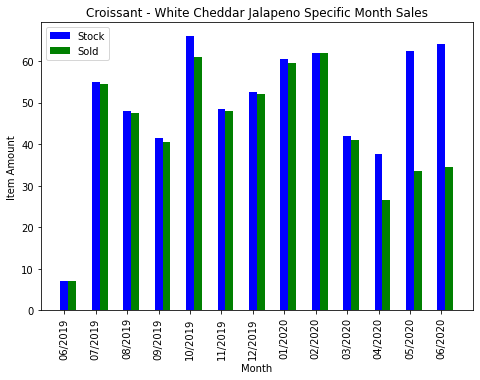

<Figure size 432x288 with 0 Axes>

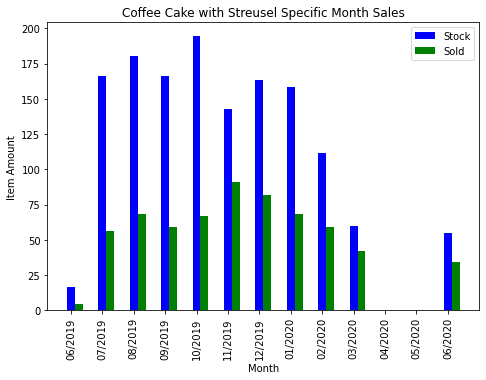

<Figure size 432x288 with 0 Axes>

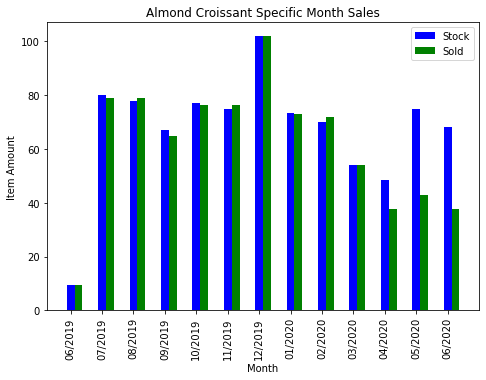

<Figure size 432x288 with 0 Axes>

In [ ]:
monthly_patterns(store18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


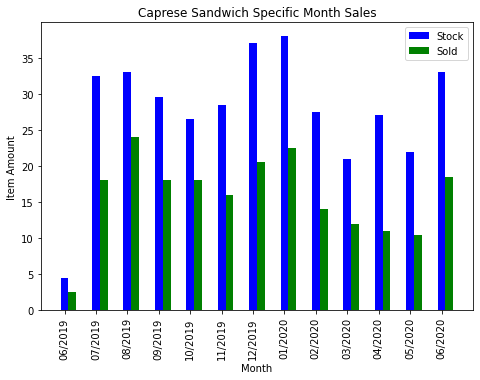

<Figure size 432x288 with 0 Axes>

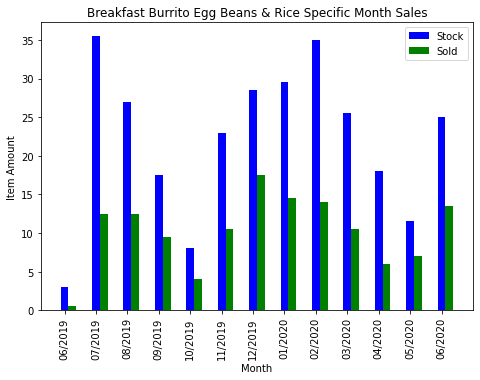

<Figure size 432x288 with 0 Axes>

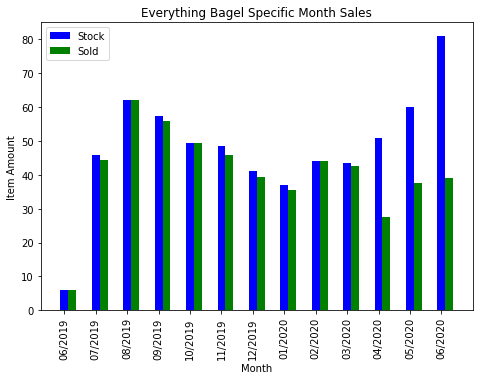

<Figure size 432x288 with 0 Axes>

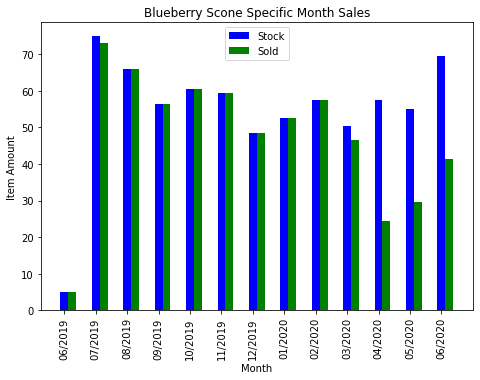

<Figure size 432x288 with 0 Axes>

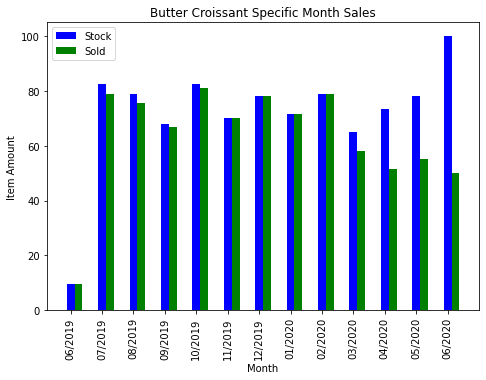

<Figure size 432x288 with 0 Axes>

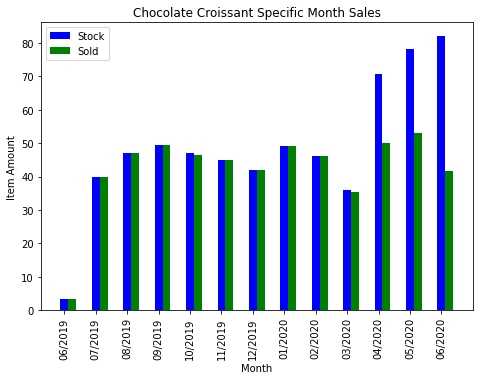

<Figure size 432x288 with 0 Axes>

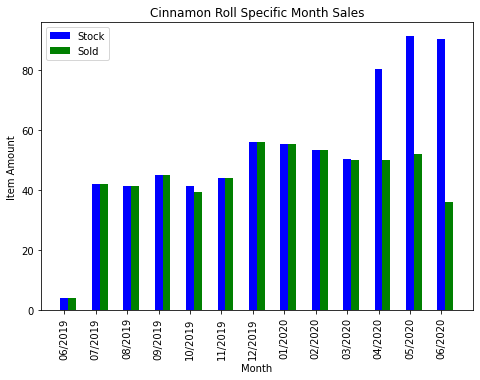

<Figure size 432x288 with 0 Axes>

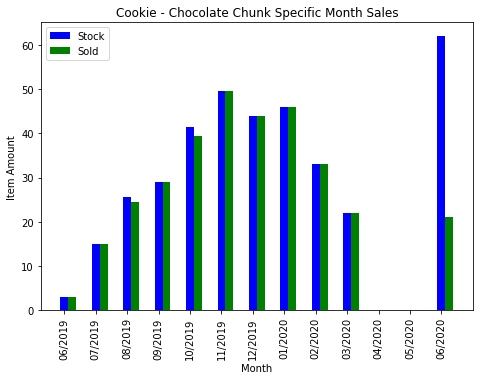

<Figure size 432x288 with 0 Axes>

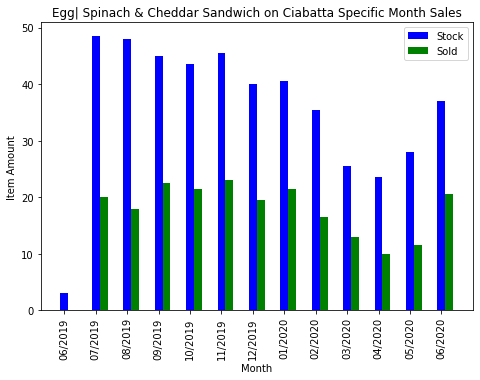

<Figure size 432x288 with 0 Axes>

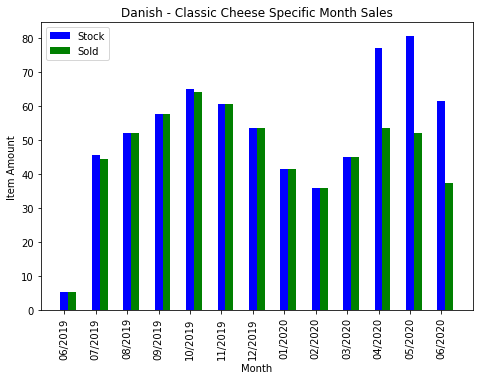

<Figure size 432x288 with 0 Axes>

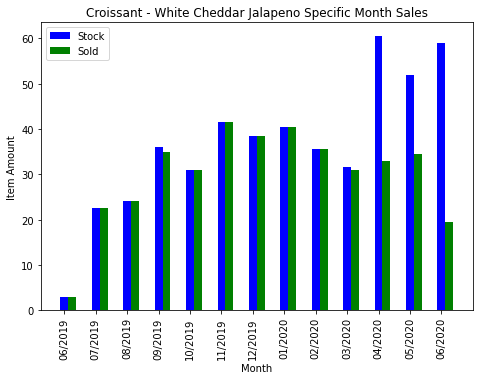

<Figure size 432x288 with 0 Axes>

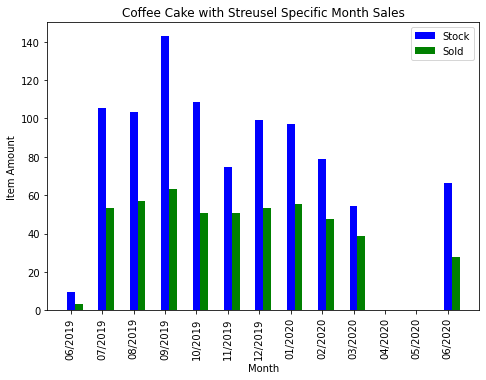

<Figure size 432x288 with 0 Axes>

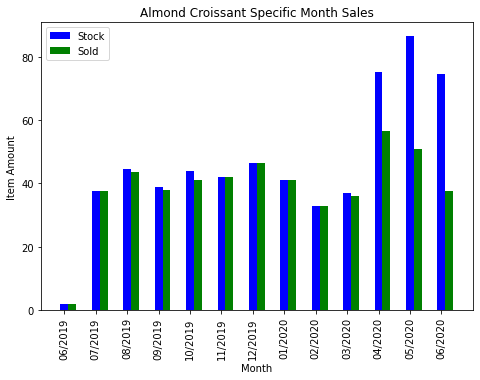

<Figure size 432x288 with 0 Axes>

In [ ]:
monthly_patterns(store117)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


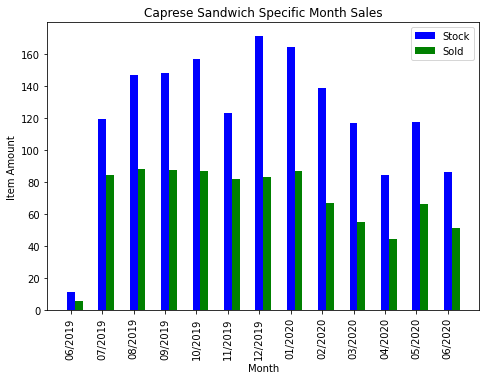

<Figure size 432x288 with 0 Axes>

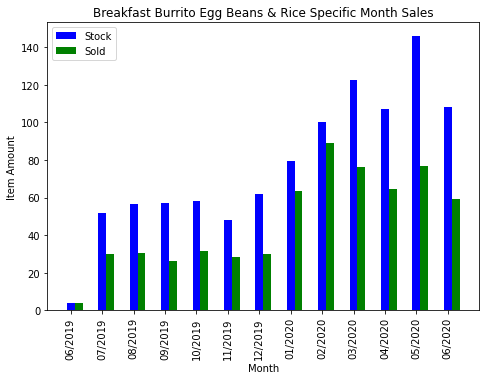

<Figure size 432x288 with 0 Axes>

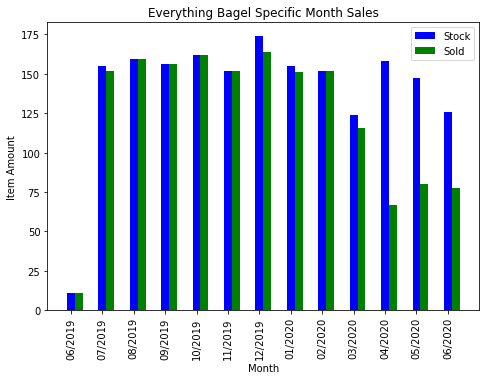

<Figure size 432x288 with 0 Axes>

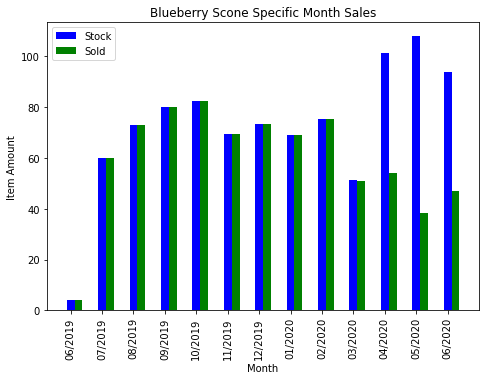

<Figure size 432x288 with 0 Axes>

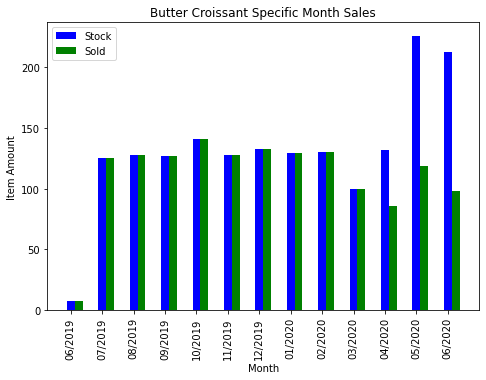

<Figure size 432x288 with 0 Axes>

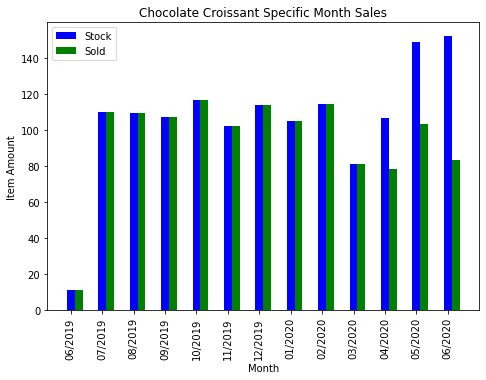

<Figure size 432x288 with 0 Axes>

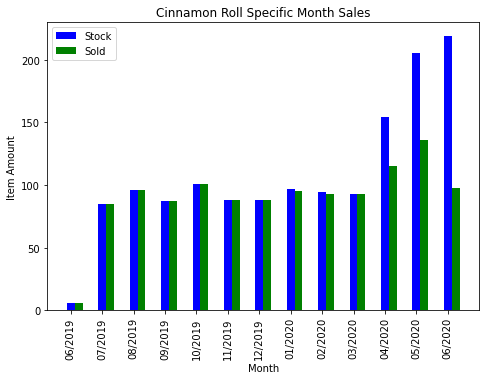

<Figure size 432x288 with 0 Axes>

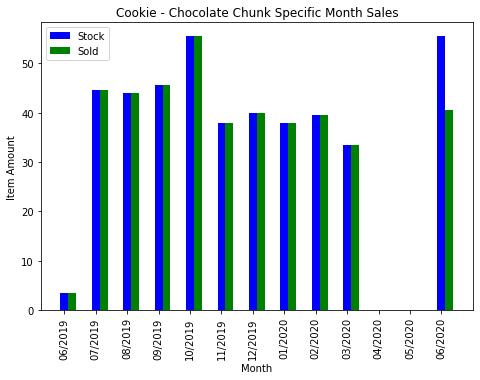

<Figure size 432x288 with 0 Axes>

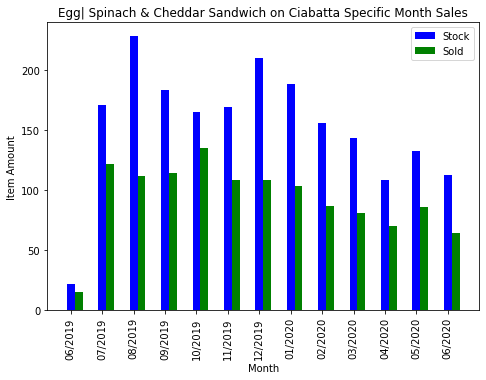

<Figure size 432x288 with 0 Axes>

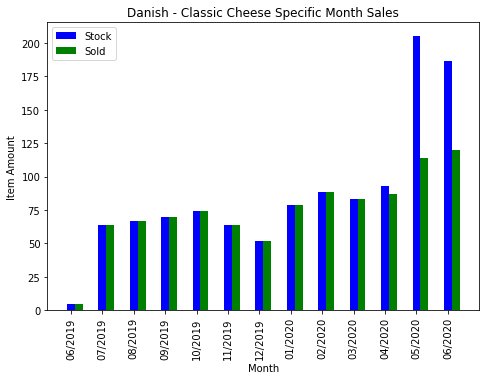

<Figure size 432x288 with 0 Axes>

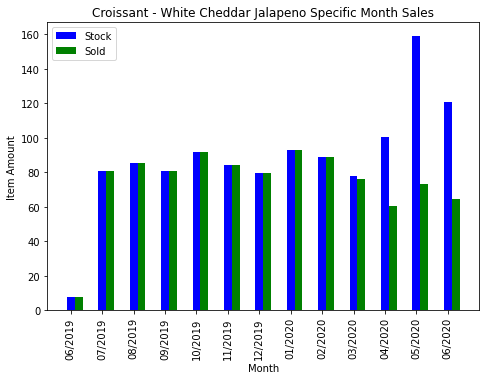

<Figure size 432x288 with 0 Axes>

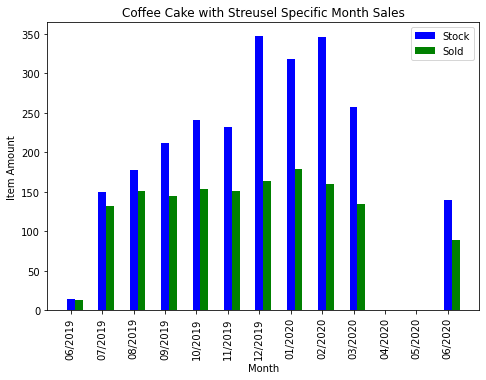

<Figure size 432x288 with 0 Axes>

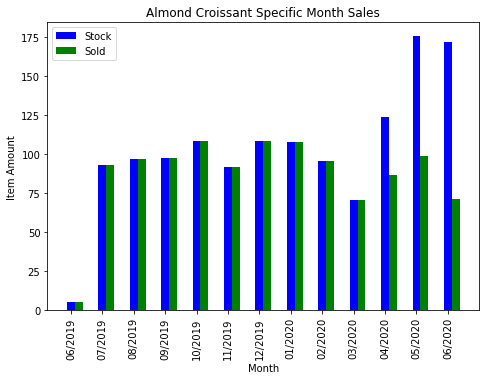

<Figure size 432x288 with 0 Axes>

In [ ]:
monthly_patterns(store332)

# Weather

In [ ]:
def weather_pattern_sales(df):
  tempuratureEffects = []
  namesMainData = df['Description'].unique()
  for name in namesMainData:
    itemDates = df[df['Description']==name]['BusinessDate'].unique()
    avgTemps = []
    stocks = []
    sales = []
    for date in itemDates:
      temperature = round(df[df['BusinessDate'] == date]['temp'].mean(),0)
      if (temperature in avgTemps):
        sales[avgTemps.index(temperature)] = (sales[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())/2
        stocks[avgTemps.index(temperature)] = (stocks[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())/2 
      else:
        avgTemps.append(temperature)
        sales.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())
        stocks.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())

    tempuratureEffects.append([name, avgTemps, sales, stocks])
    
  for j in tempuratureEffects:
    for n in range(len(j[1])-1, 0, -1):
      for i in range(n):
        if j[1][i] < j[1][i+1]:
            j[1][i], j[1][i + 1] = j[1][i + 1], j[1][i]
            j[2][i], j[2][i + 1] = j[2][i + 1], j[2][i]
            j[3][i], j[3][i + 1] = j[3][i + 1], j[3][i]

  for item in tempuratureEffects:
    data = [item[2], item[3]]
    X = np.arange(len(item[1]))
    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
    ax.legend(labels=['Sold', 'Stock'])
    axisTicks = ()
    for i in item[1]:
      titleDate = i
      axisTicks = axisTicks + (titleDate,)

    plt.xticks(X, (axisTicks))
    plt.title(item[0] +"Temperature Sales and Stock")
    plt.xlabel('Temperature F')
    plt.ylabel('Item Amount')
    plt.xticks(fontsize='10' , rotation=90)

    fig = plt.figure()







In [ ]:
def weathercondition_pattern_sales(df):
  
  namesMainData = df['Description'].unique()
  for name in namesMainData:
    
    stocks = list()
    sales = list()
    conditions = df['conditions'].unique()
    for condition in conditions:
        sales.append(df[(df['Description'] == name) & (df['conditions'] == condition)]['SoldQuantity'].mean())
        stocks.append(df[(df['Description'] == name) & (df['conditions'] == condition)]['SoldQuantity'].mean() + df[(df['Description'] == name)]['EndQuantity'].mean())

    sales.append(df[(df['Description'] == name)]['SoldQuantity'].mean())
    stocks.append(df[(df['Description'] == name)]['SoldQuantity'].mean() + df[(df['Description'] == name)]['EndQuantity'].mean())
    conditions = np.append(conditions, 'Yearly Average')
    fig = plt.figure(figsize=(10, 3))
    X_axis = np.arange(len(conditions))
    
    

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X_axis - 0.2, sales, color = 'b', width = 0.25)
    ax.bar(X_axis + 0.2, stocks, color = 'g', width = 0.25)
    plt.xticks(X_axis, conditions)
    ax.legend(labels=['Sold', 'Stock'])
    plt.title(name +" Weather Condition Sales and Stock")
    plt.ylabel('Item Amount')
    plt.xticks(fontsize='10')

    fig = plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


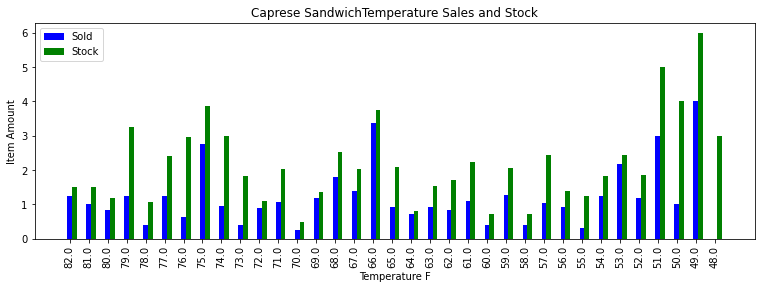

<Figure size 432x288 with 0 Axes>

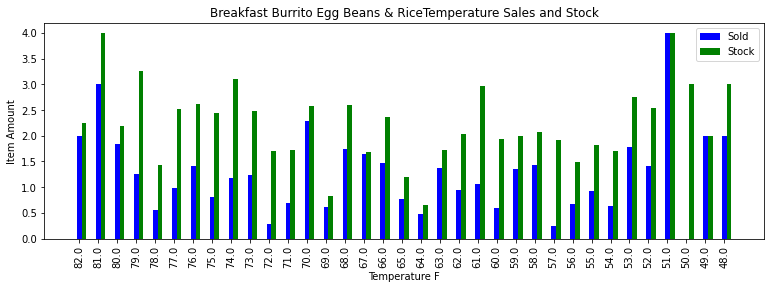

<Figure size 432x288 with 0 Axes>

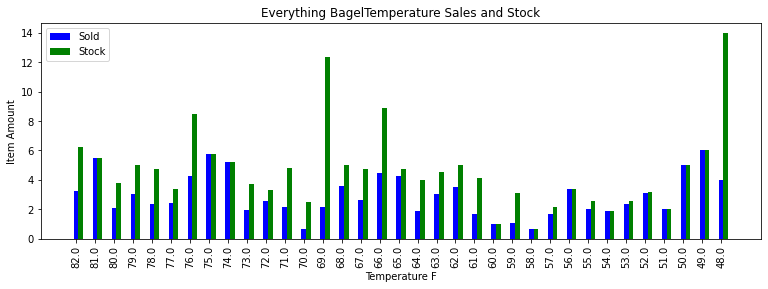

<Figure size 432x288 with 0 Axes>

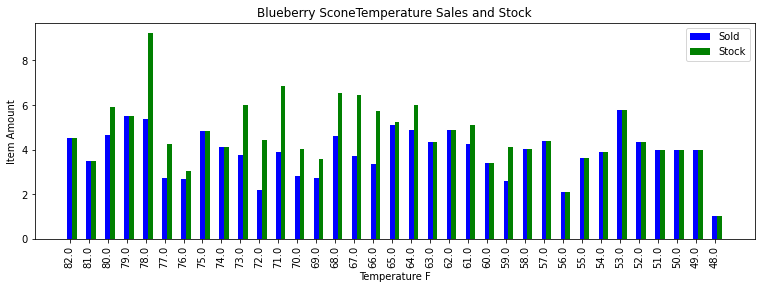

<Figure size 432x288 with 0 Axes>

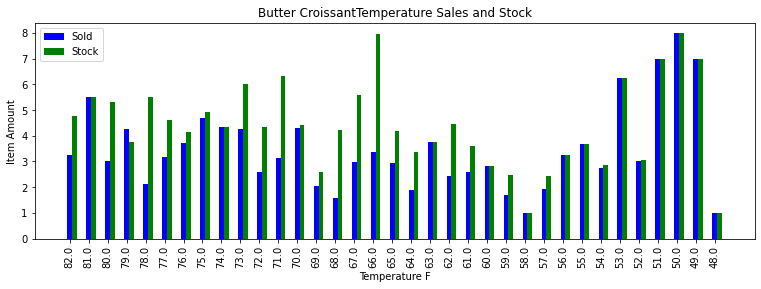

<Figure size 432x288 with 0 Axes>

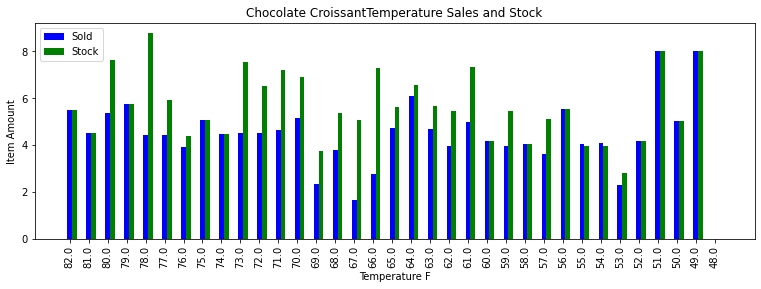

<Figure size 432x288 with 0 Axes>

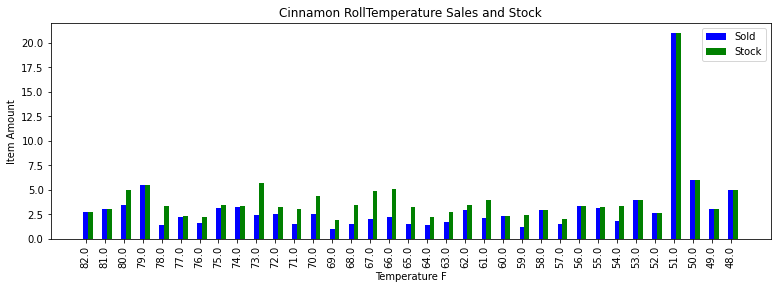

<Figure size 432x288 with 0 Axes>

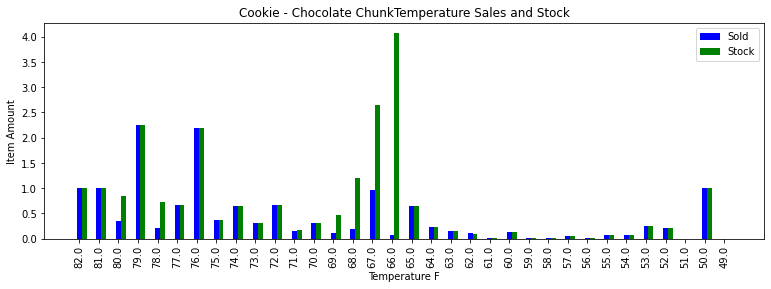

<Figure size 432x288 with 0 Axes>

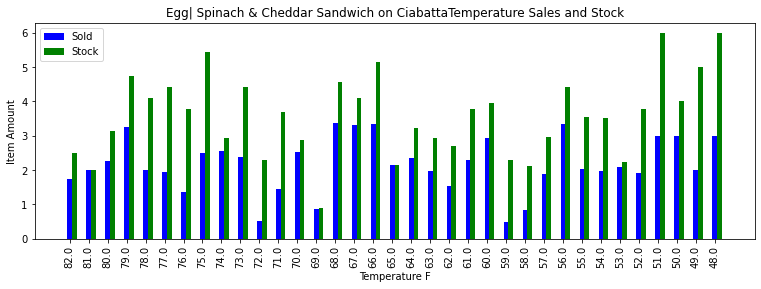

<Figure size 432x288 with 0 Axes>

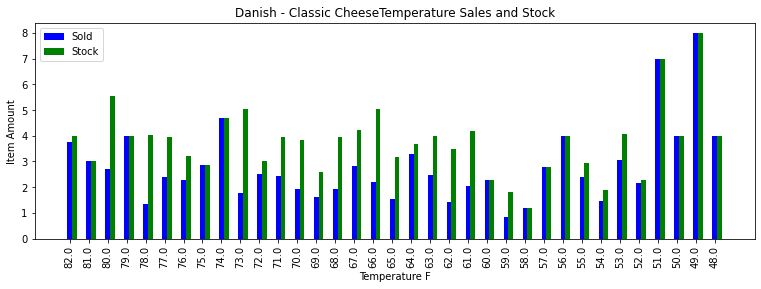

<Figure size 432x288 with 0 Axes>

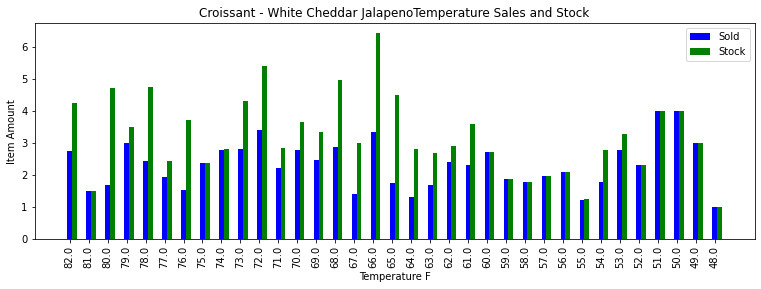

<Figure size 432x288 with 0 Axes>

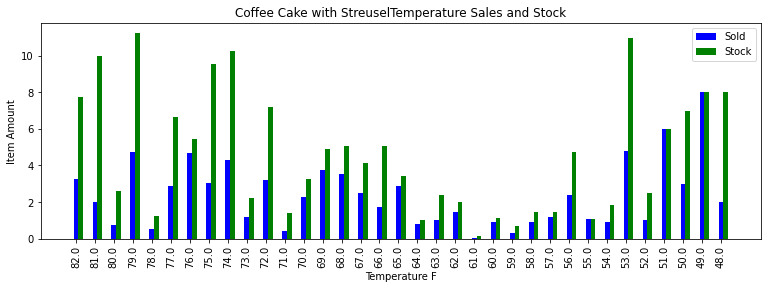

<Figure size 432x288 with 0 Axes>

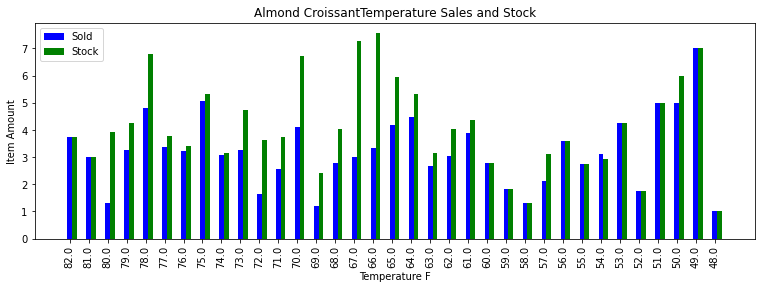

<Figure size 432x288 with 0 Axes>

In [ ]:
weather_pattern_sales(store18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


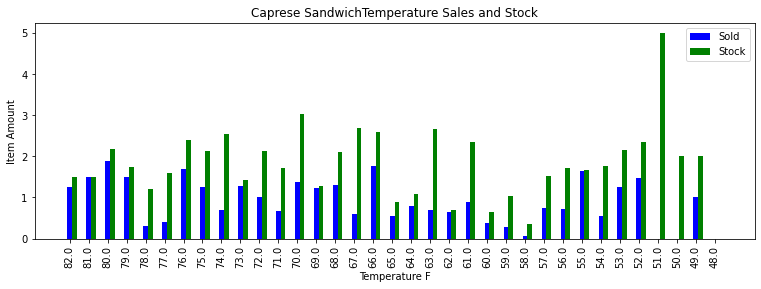

<Figure size 432x288 with 0 Axes>

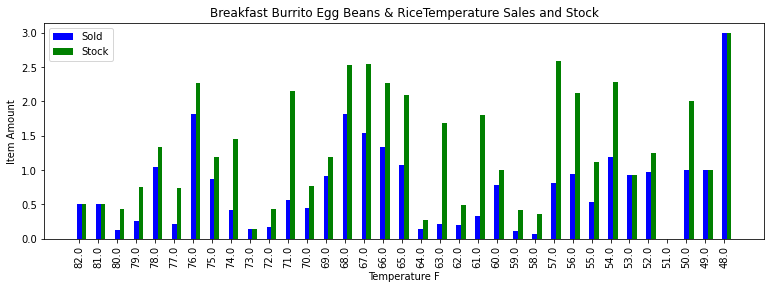

<Figure size 432x288 with 0 Axes>

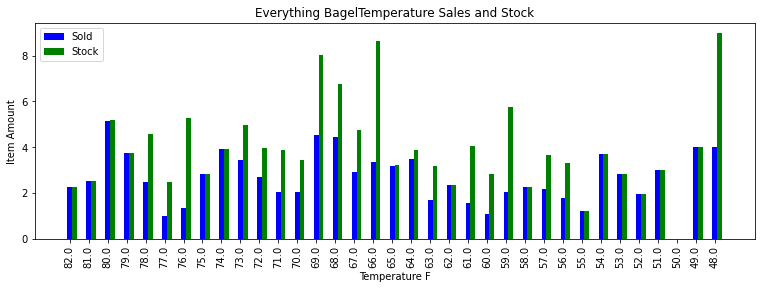

<Figure size 432x288 with 0 Axes>

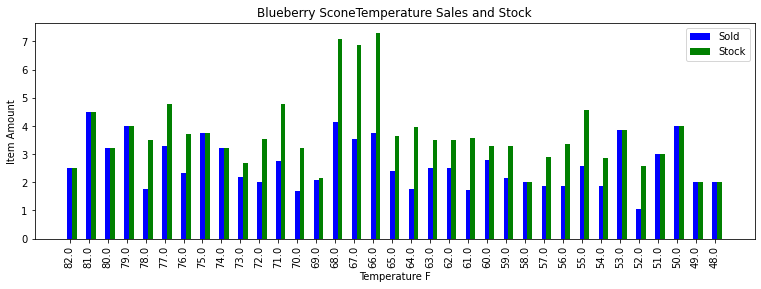

<Figure size 432x288 with 0 Axes>

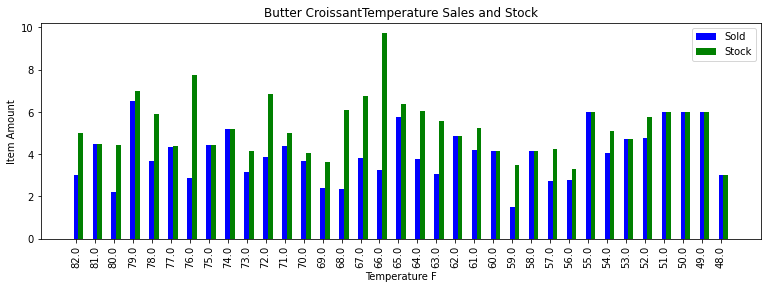

<Figure size 432x288 with 0 Axes>

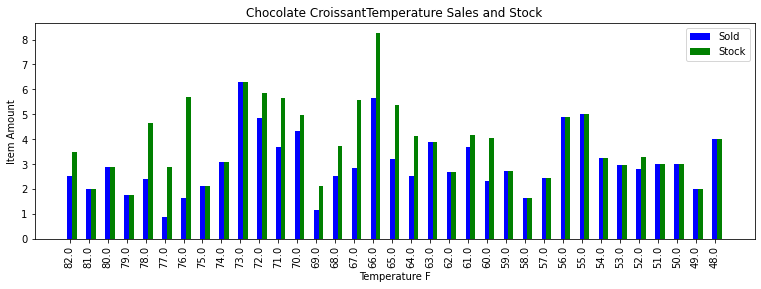

<Figure size 432x288 with 0 Axes>

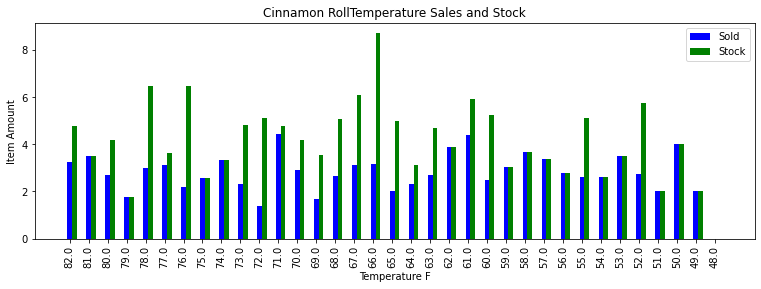

<Figure size 432x288 with 0 Axes>

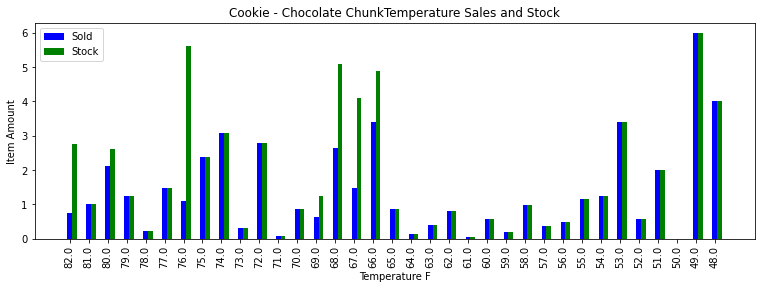

<Figure size 432x288 with 0 Axes>

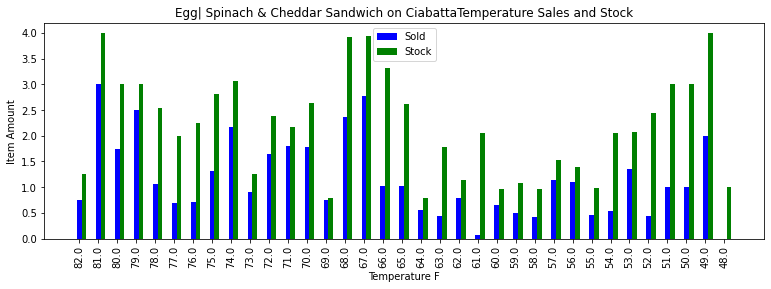

<Figure size 432x288 with 0 Axes>

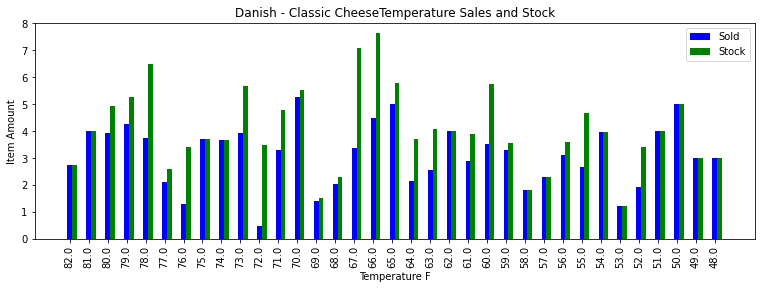

<Figure size 432x288 with 0 Axes>

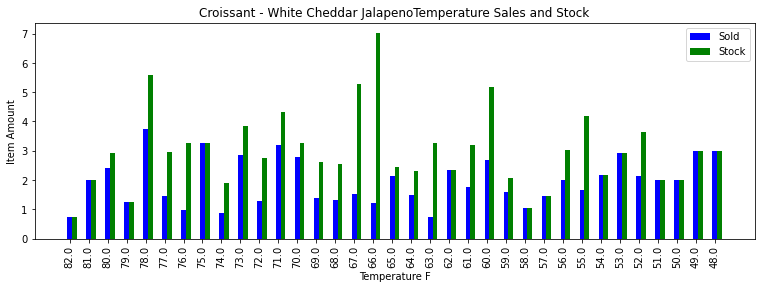

<Figure size 432x288 with 0 Axes>

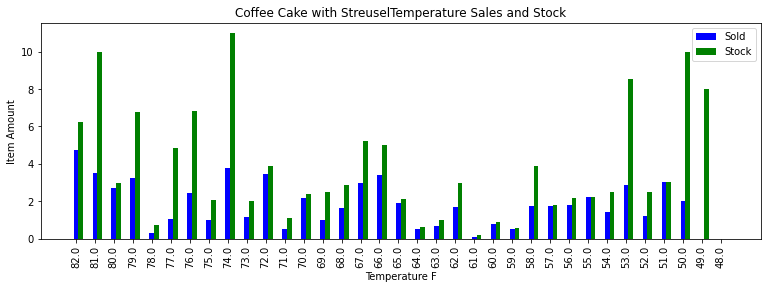

<Figure size 432x288 with 0 Axes>

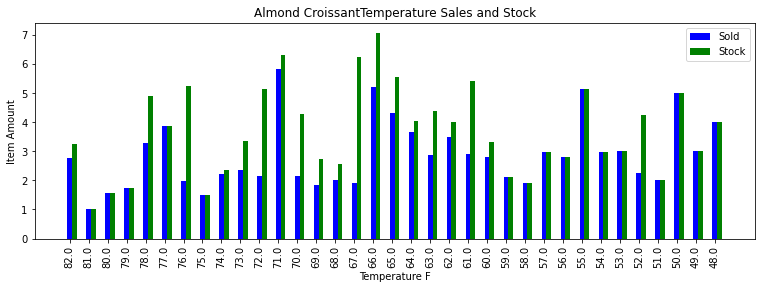

<Figure size 432x288 with 0 Axes>

In [ ]:
weather_pattern_sales(store117)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


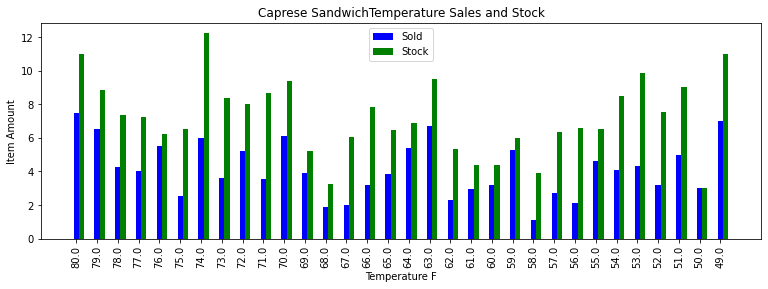

<Figure size 432x288 with 0 Axes>

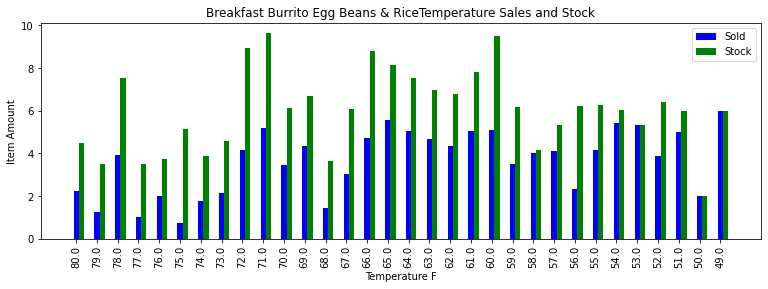

<Figure size 432x288 with 0 Axes>

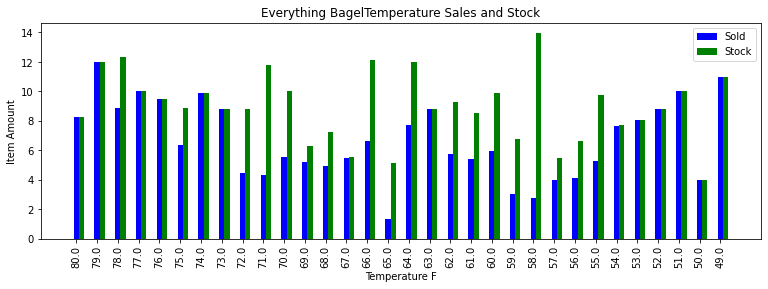

<Figure size 432x288 with 0 Axes>

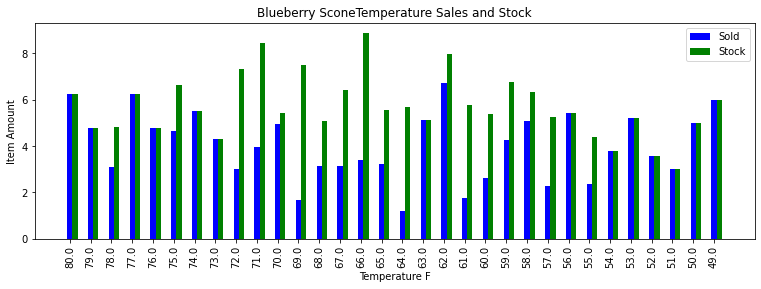

<Figure size 432x288 with 0 Axes>

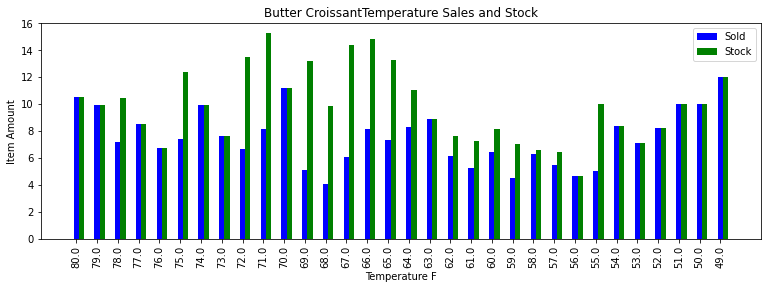

<Figure size 432x288 with 0 Axes>

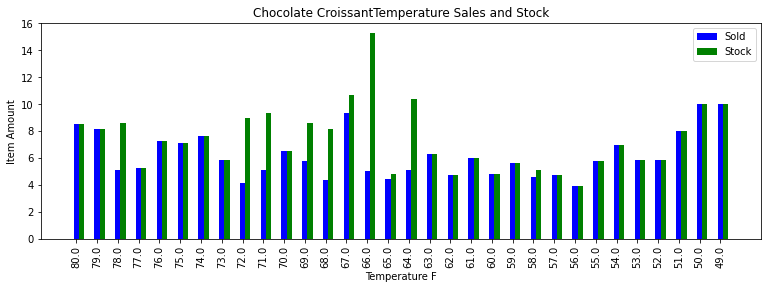

<Figure size 432x288 with 0 Axes>

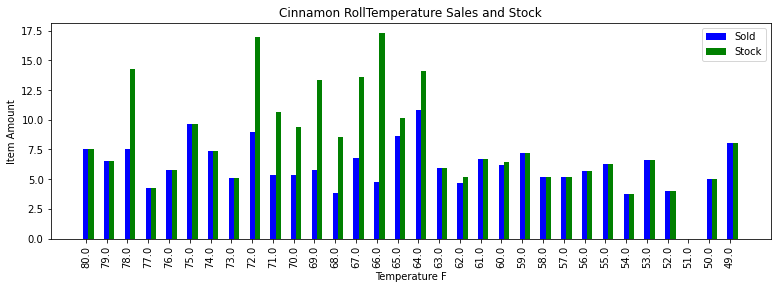

<Figure size 432x288 with 0 Axes>

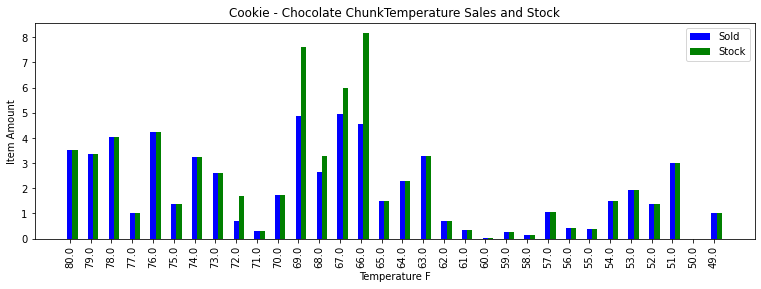

<Figure size 432x288 with 0 Axes>

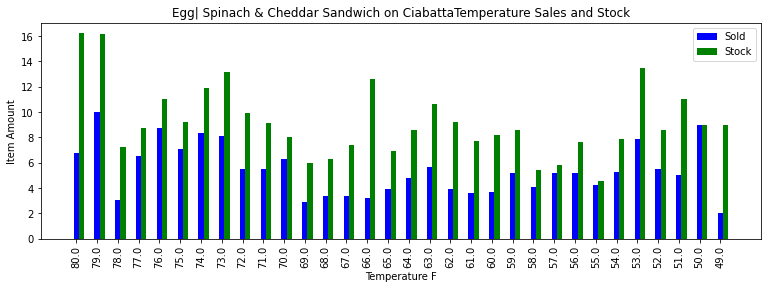

<Figure size 432x288 with 0 Axes>

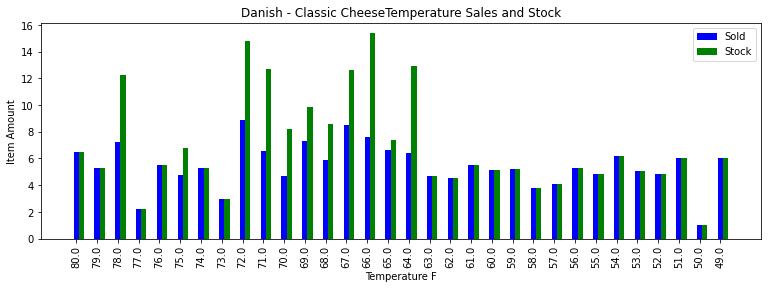

<Figure size 432x288 with 0 Axes>

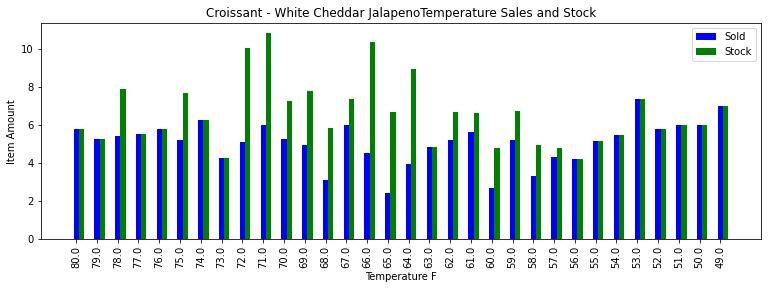

<Figure size 432x288 with 0 Axes>

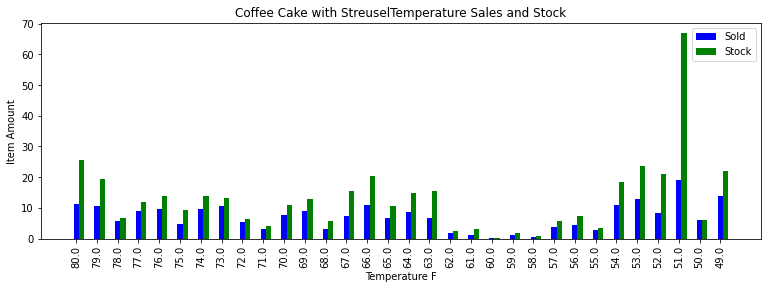

<Figure size 432x288 with 0 Axes>

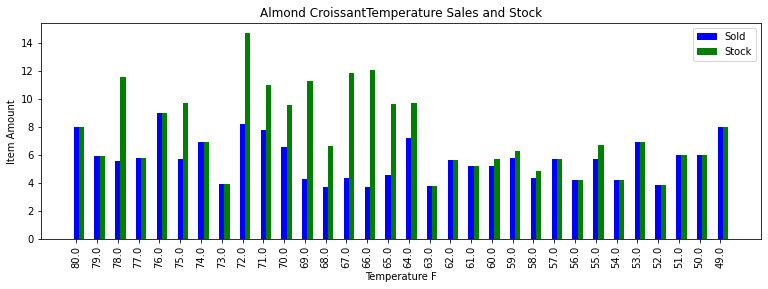

<Figure size 432x288 with 0 Axes>

In [ ]:
weather_pattern_sales(store332)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


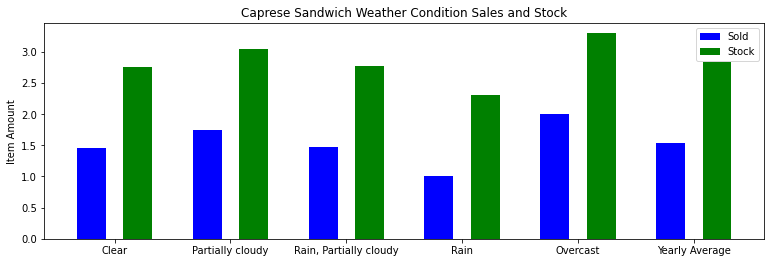

<Figure size 432x288 with 0 Axes>

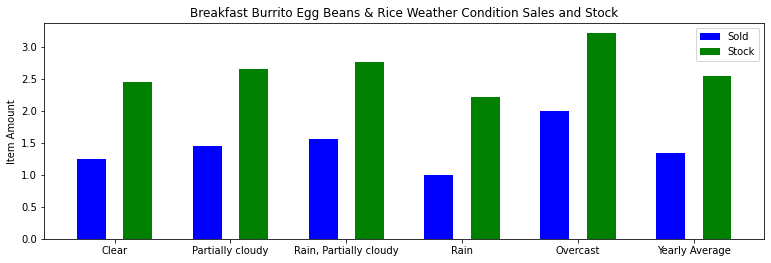

<Figure size 432x288 with 0 Axes>

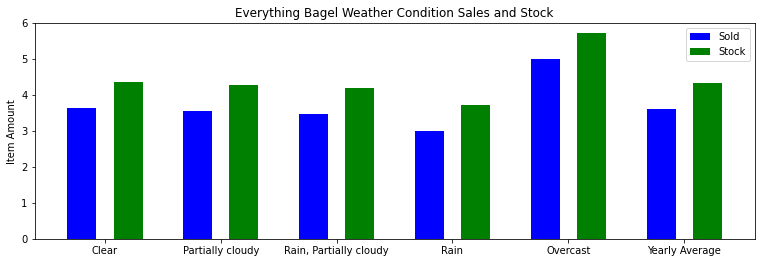

<Figure size 432x288 with 0 Axes>

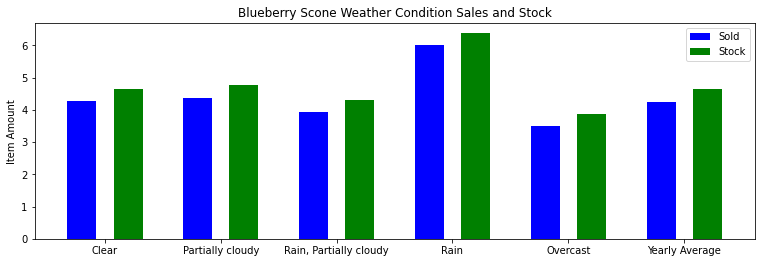

<Figure size 432x288 with 0 Axes>

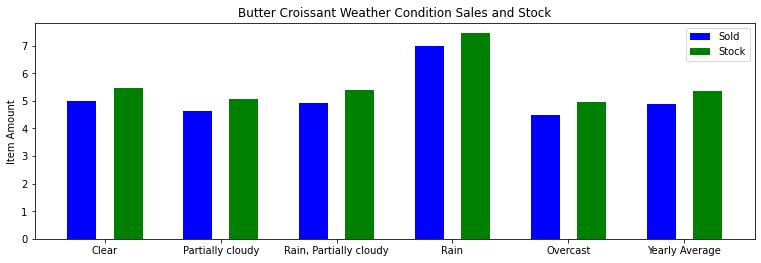

<Figure size 432x288 with 0 Axes>

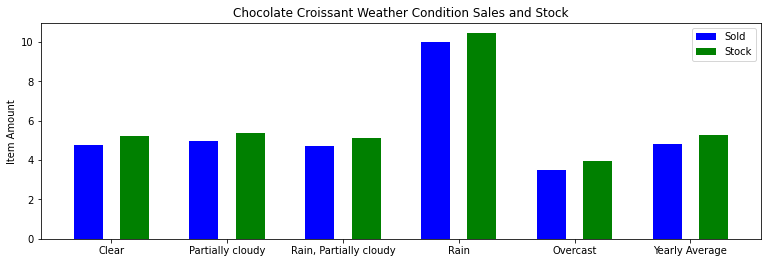

<Figure size 432x288 with 0 Axes>

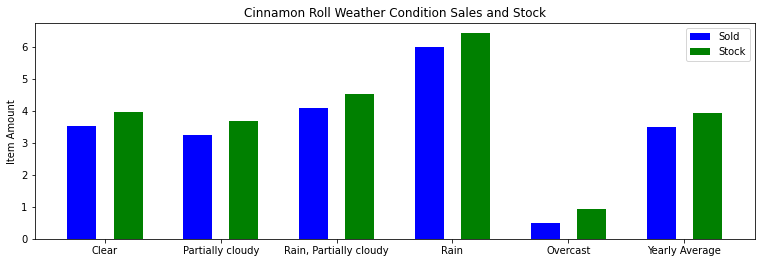

<Figure size 432x288 with 0 Axes>

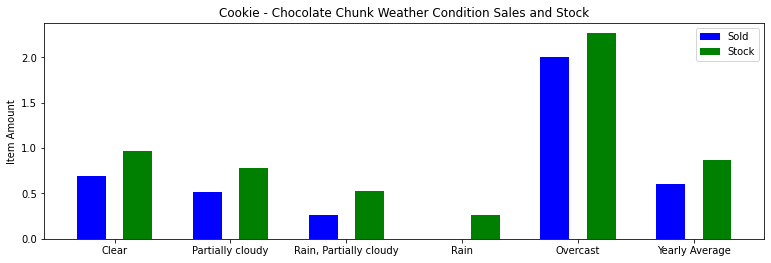

<Figure size 432x288 with 0 Axes>

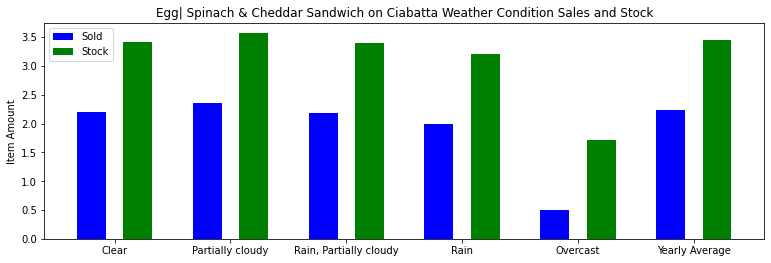

<Figure size 432x288 with 0 Axes>

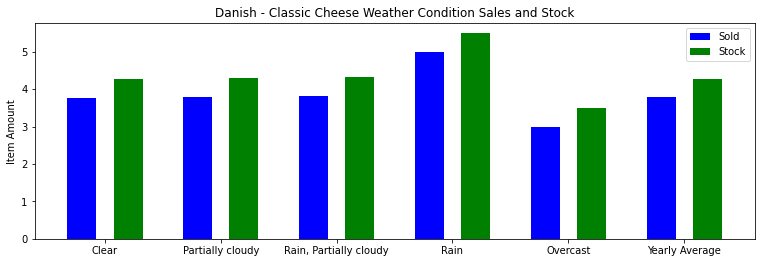

<Figure size 432x288 with 0 Axes>

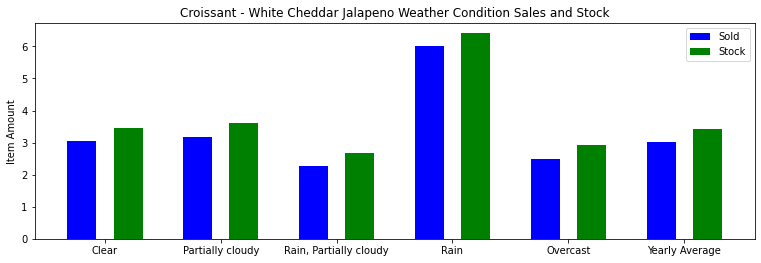

<Figure size 432x288 with 0 Axes>

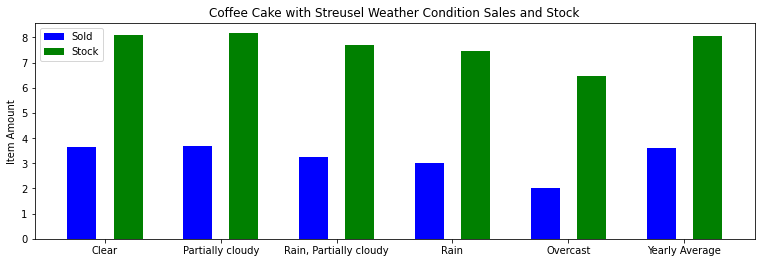

<Figure size 432x288 with 0 Axes>

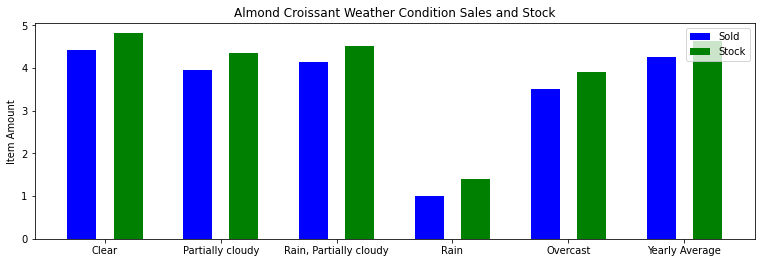

<Figure size 432x288 with 0 Axes>

In [ ]:
weathercondition_pattern_sales(store18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


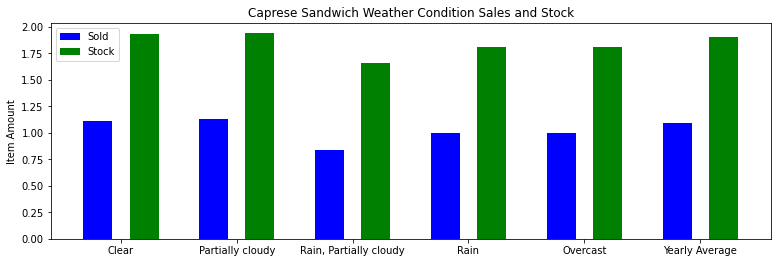

<Figure size 432x288 with 0 Axes>

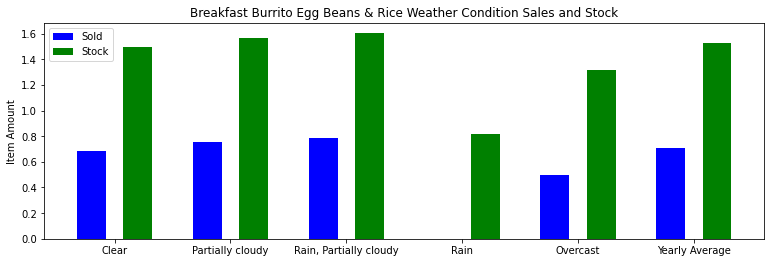

<Figure size 432x288 with 0 Axes>

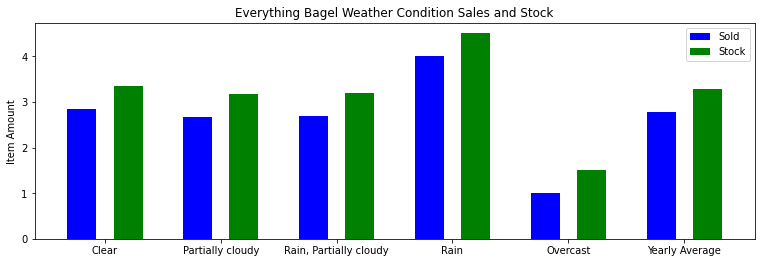

<Figure size 432x288 with 0 Axes>

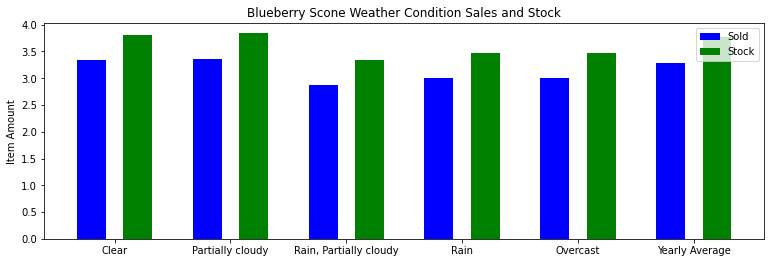

<Figure size 432x288 with 0 Axes>

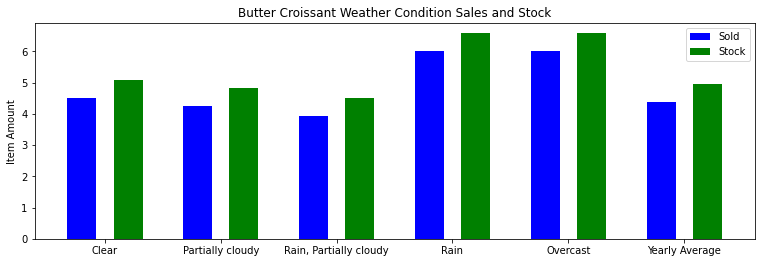

<Figure size 432x288 with 0 Axes>

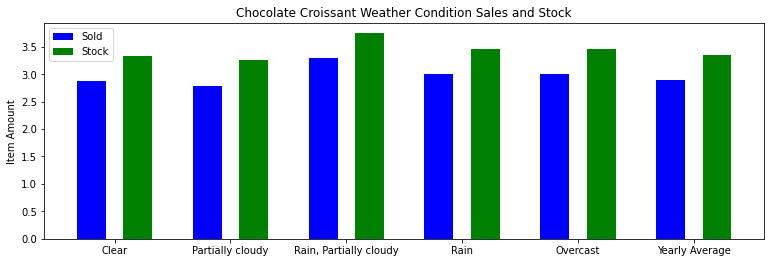

<Figure size 432x288 with 0 Axes>

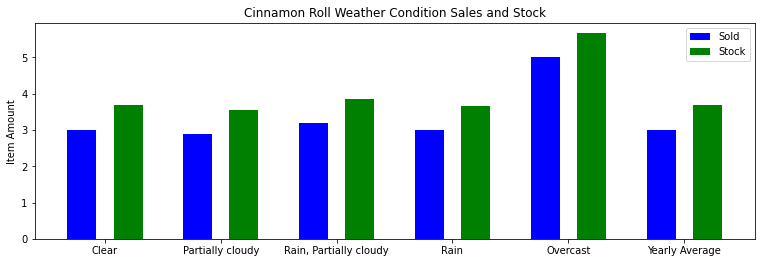

<Figure size 432x288 with 0 Axes>

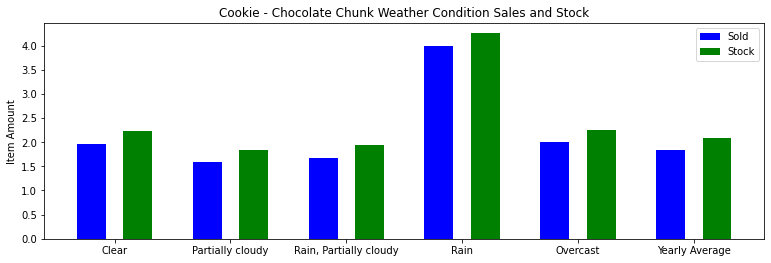

<Figure size 432x288 with 0 Axes>

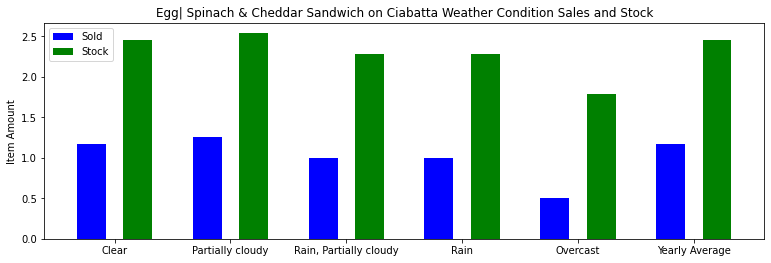

<Figure size 432x288 with 0 Axes>

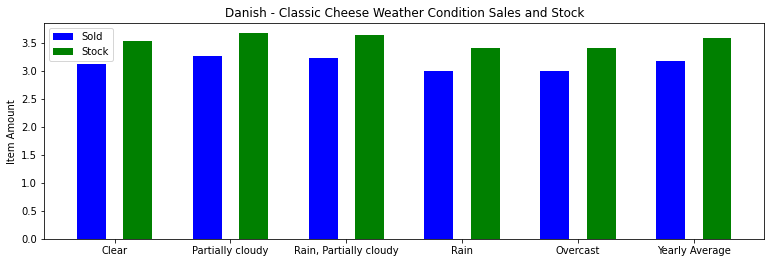

<Figure size 432x288 with 0 Axes>

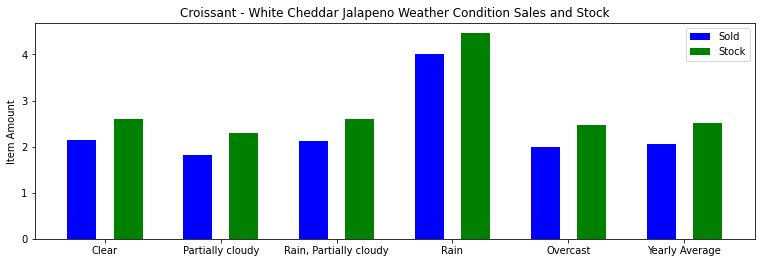

<Figure size 432x288 with 0 Axes>

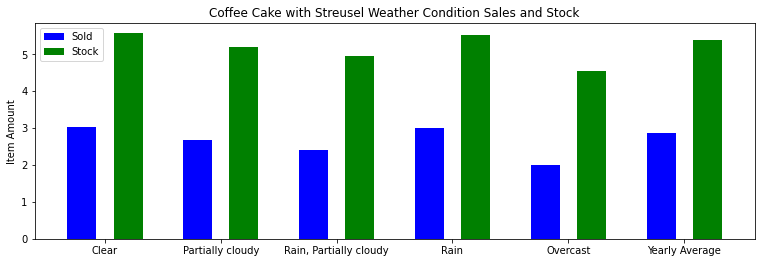

<Figure size 432x288 with 0 Axes>

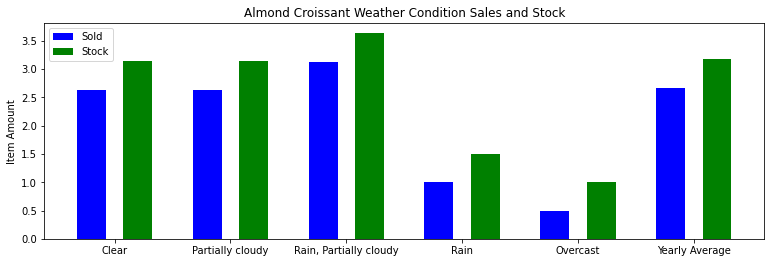

<Figure size 432x288 with 0 Axes>

In [ ]:
weathercondition_pattern_sales(store117)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


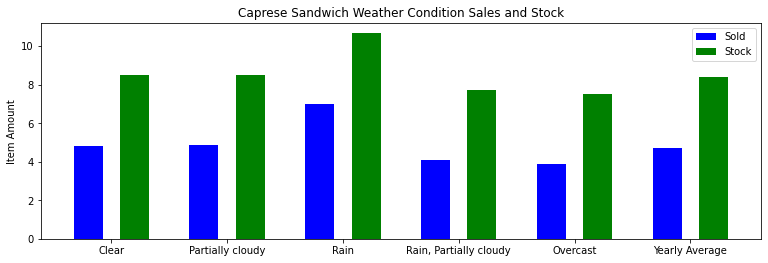

<Figure size 432x288 with 0 Axes>

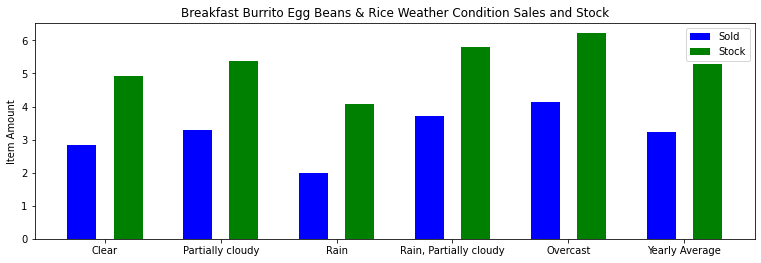

<Figure size 432x288 with 0 Axes>

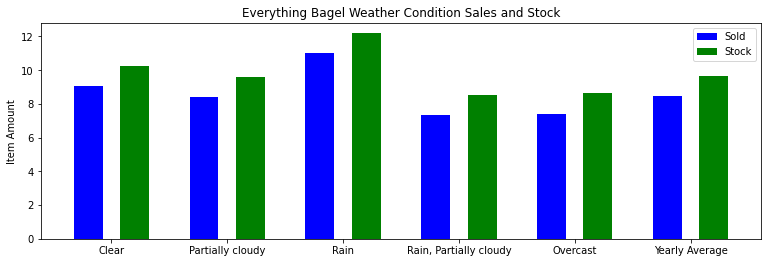

<Figure size 432x288 with 0 Axes>

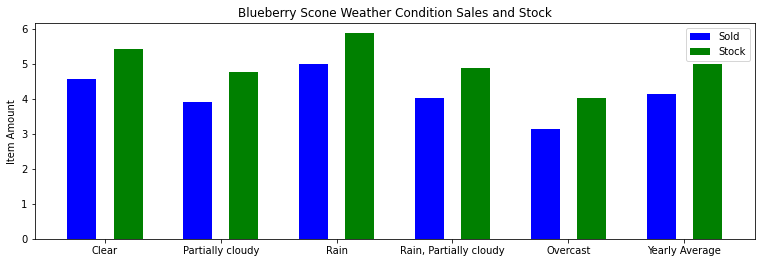

<Figure size 432x288 with 0 Axes>

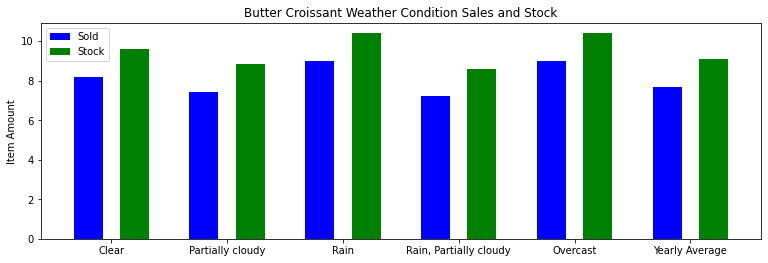

<Figure size 432x288 with 0 Axes>

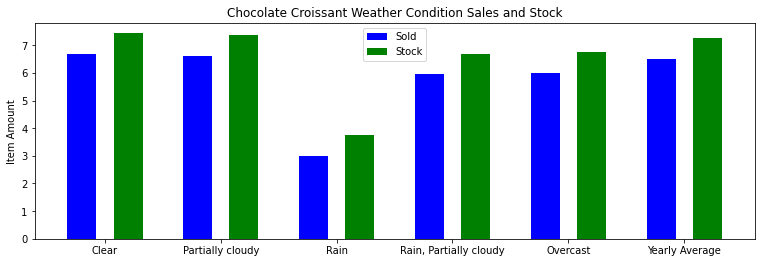

<Figure size 432x288 with 0 Axes>

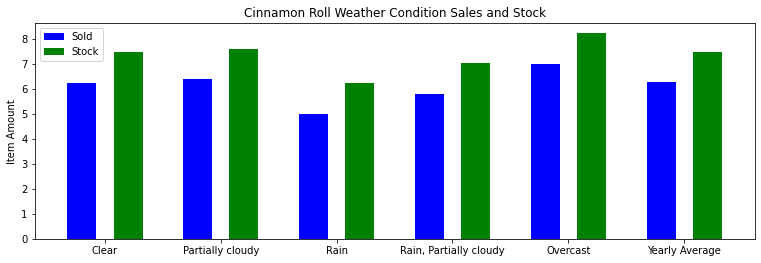

<Figure size 432x288 with 0 Axes>

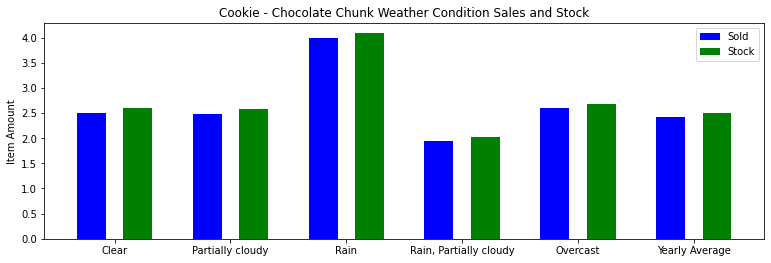

<Figure size 432x288 with 0 Axes>

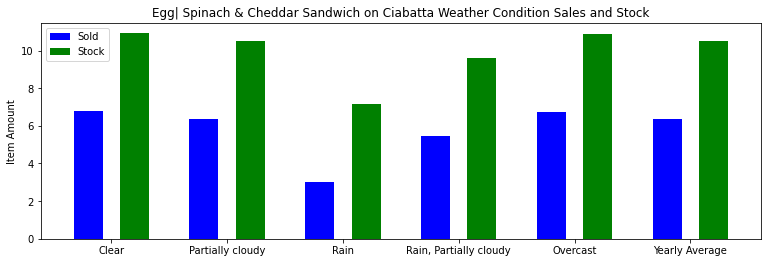

<Figure size 432x288 with 0 Axes>

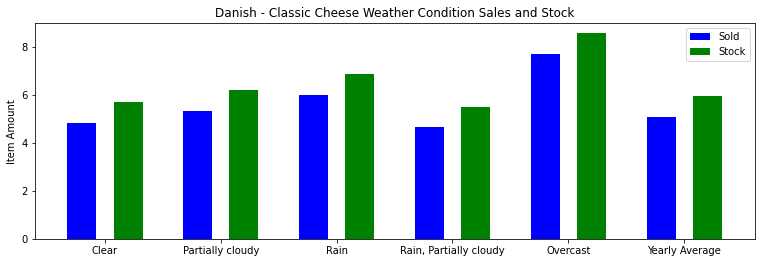

<Figure size 432x288 with 0 Axes>

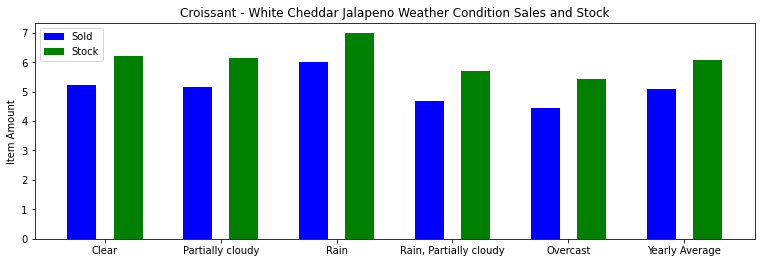

<Figure size 432x288 with 0 Axes>

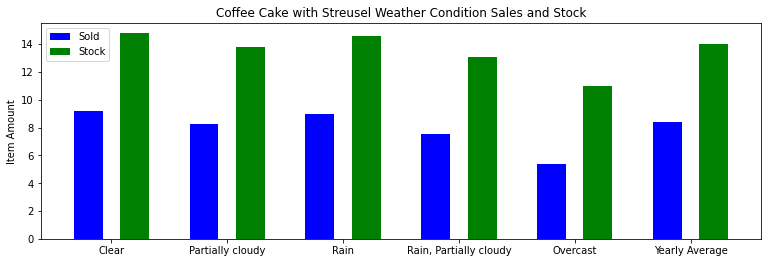

<Figure size 432x288 with 0 Axes>

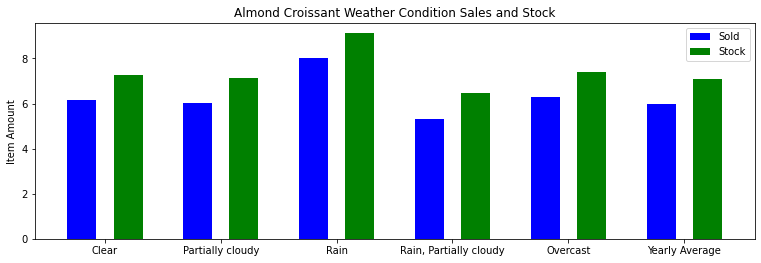

<Figure size 432x288 with 0 Axes>

In [ ]:
weathercondition_pattern_sales(store332)

# Drive Thru Features

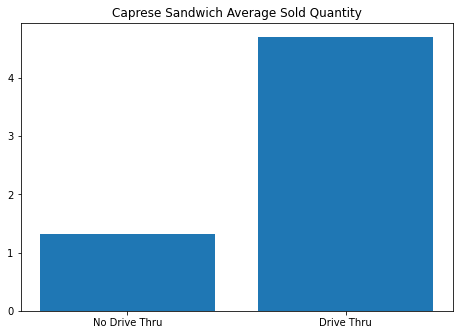

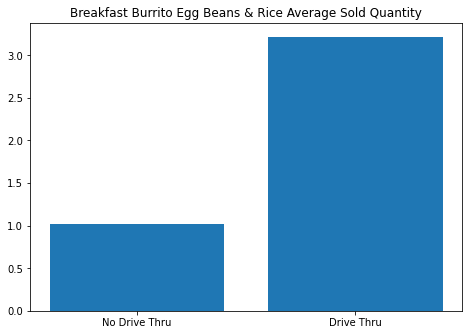

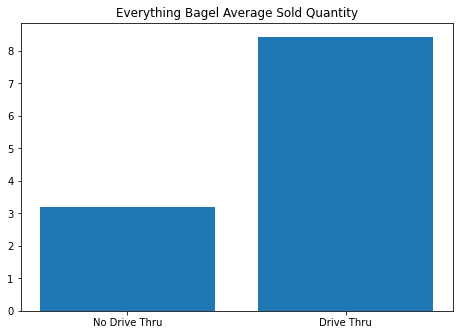

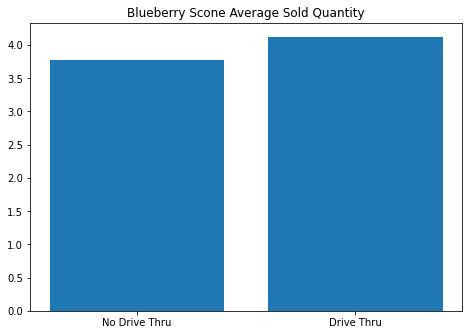

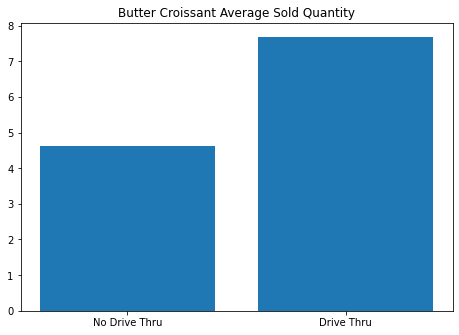

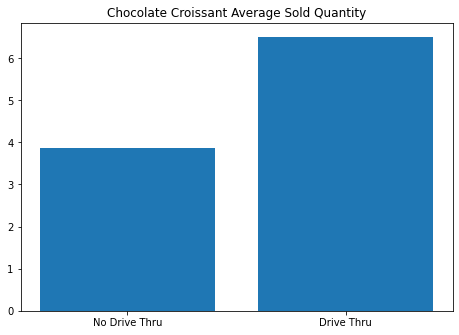

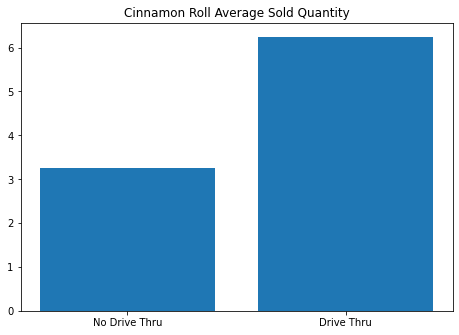

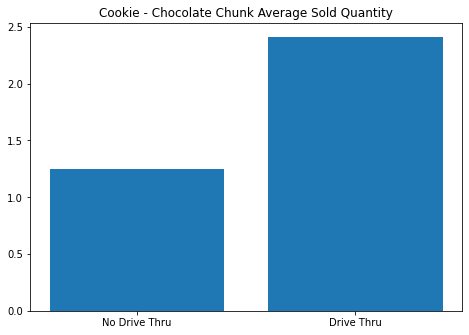

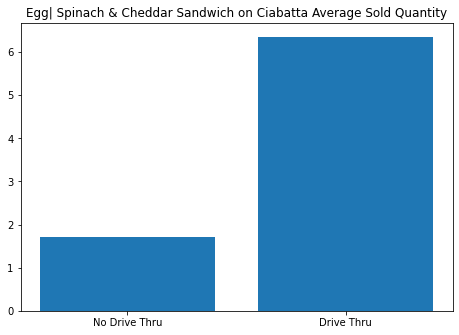

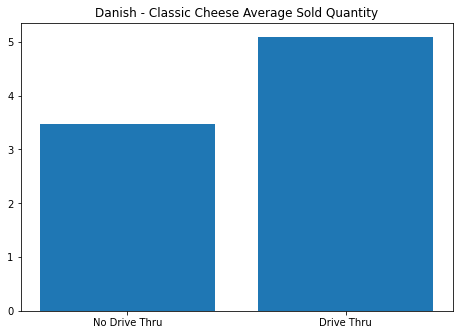

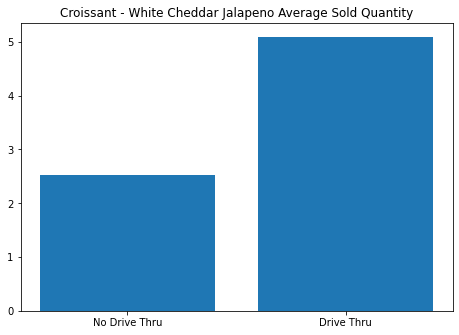

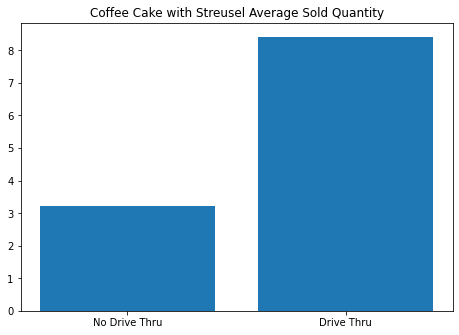

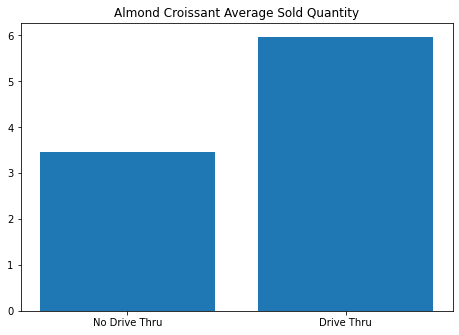

In [ ]:
# Add an extra feature to the the data frame
drive_thru = [row == 332 for row in local_df['StoreID']]
local_df['DriveThru'] = drive_thru
# iterate through the 
for product in local_df['Description'].unique():
  # get average sales from product based on whether there was a drive tru or not
  drive_thru_sales = local_df[(local_df['DriveThru'] == True) & (local_df['Description'] == product)]['SoldQuantity'].mean()
  no_drive_thru_sales = local_df[(local_df['DriveThru'] == False) & (local_df['Description'] == product)]['SoldQuantity'].mean()
  # make bar plot
  fig = plt.figure()
  ax = fig.add_axes( [0,0,1,1])
  labels = ['No Drive Thru',  'Drive Thru']
  ax.bar(labels, [no_drive_thru_sales, drive_thru_sales])
  ax.set_title(f'{product} Average Sold Quantity')
  plt.show()
  print('\n\n\n')



# Impact of Holidays and weekends/weekdays

In [ ]:
def special_day_impact(df):
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2018-01-01', end='2022-12-31').to_pydatetime()

    specialDayFeatures = []

    for name in df['Description'].unique():
        regularTotal = 0
        nonHolidayWeekendDailySales = 0
        holidayTotal = 0
        holidaySales = 0
        weekendTotal = 0
        weekendSales = 0
        for date in df.loc[df['Description'] == name]['BusinessDate'].unique():
            sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
            thisMonth = str(sdate.month)
            thisDay = str(sdate.day)

            if(sdate.weekday() == 5 or sdate.weekday() == 6):
                weekendTotal += 1
                weekendSales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()
            elif(sdate in holidays):
                holidayTotal += 1
                holidaySales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()
            else:
                regularTotal += 1
                nonHolidayWeekendDailySales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()

        specialDayFeatures.append([name, nonHolidayWeekendDailySales/regularTotal, weekendSales/weekendTotal, holidaySales/holidayTotal])

    for item in specialDayFeatures:

        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        sales = []
        products = ["Weekday Non-Holiday", "Weekend", "Holiday"]
        plt.title(item[0] +" Specific Day Sales")
        plt.xlabel('Days')
        plt.ylabel('Sales')
        sales.append(item[1])
        sales.append(item[2])
        sales.append(item[3])

        ax.bar(products,sales)
        plt.xticks(fontsize='10' , rotation=90)
        plt.show()    
        print()

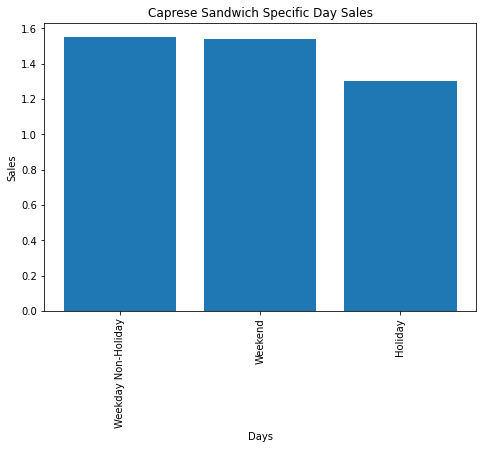

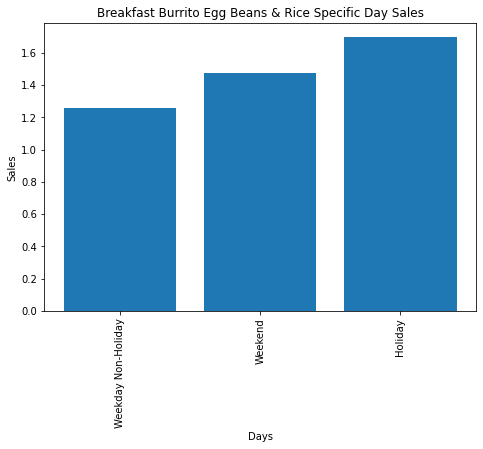

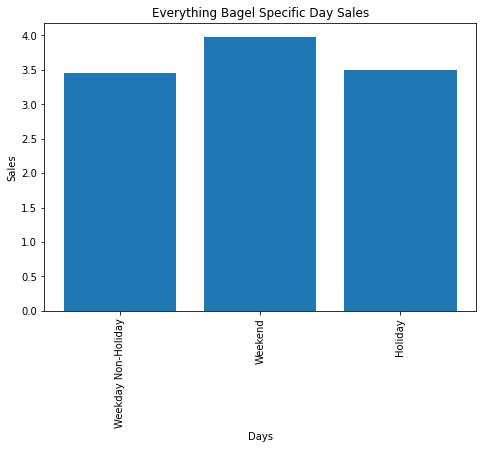

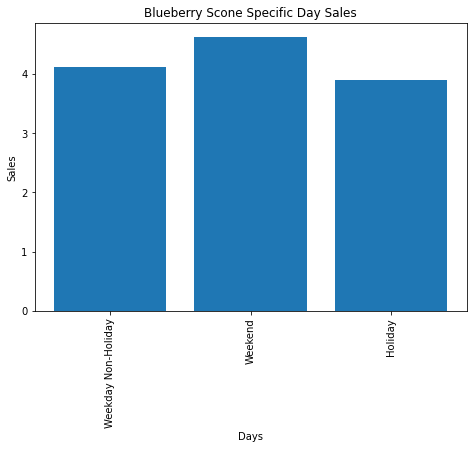

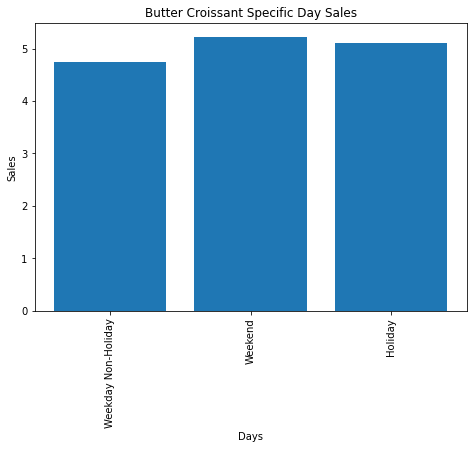

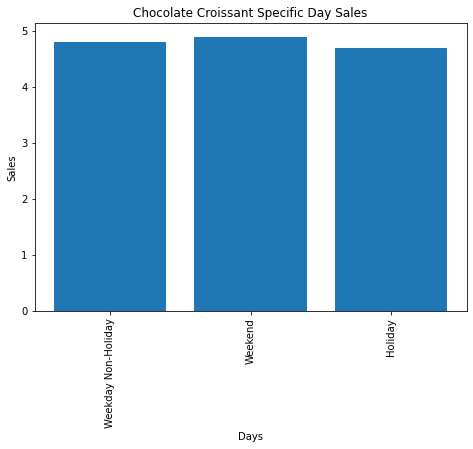

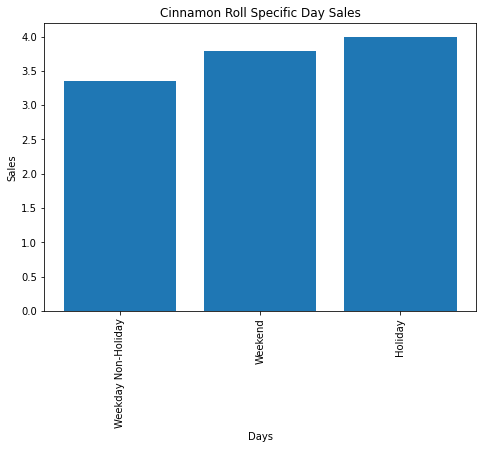

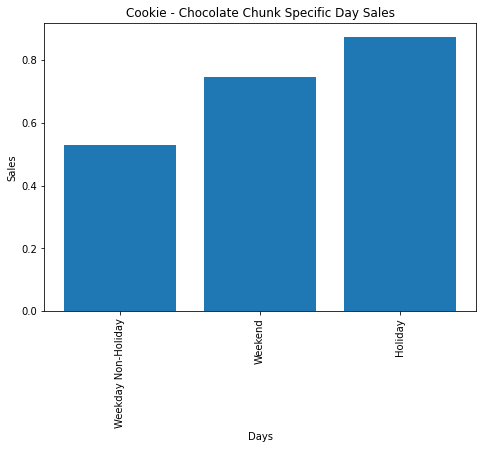

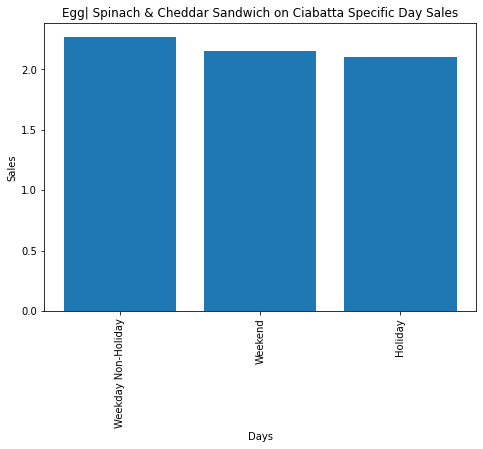

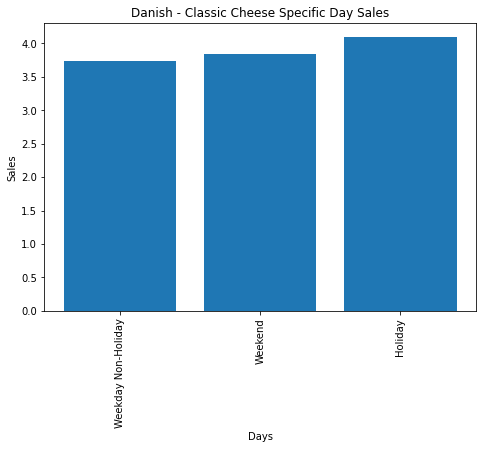

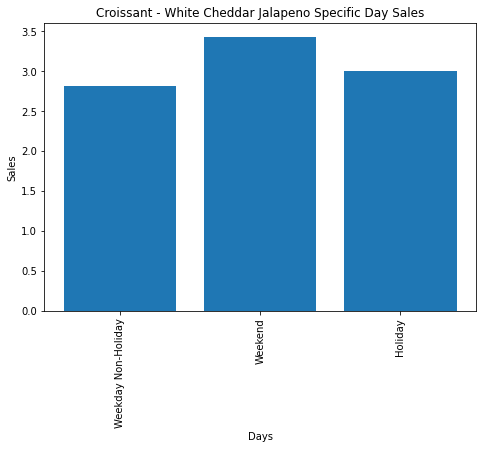

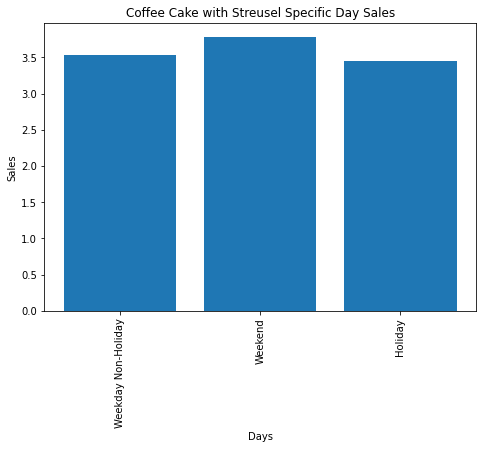

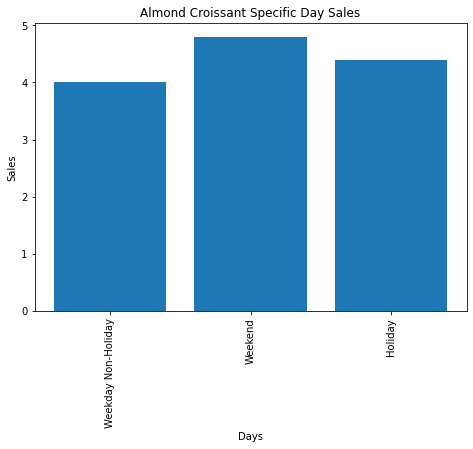

In [ ]:
special_day_impact(store18)

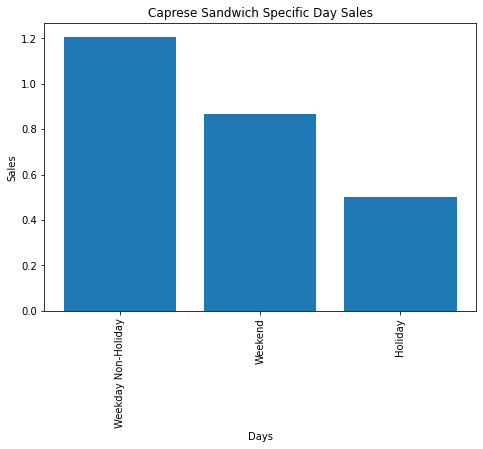

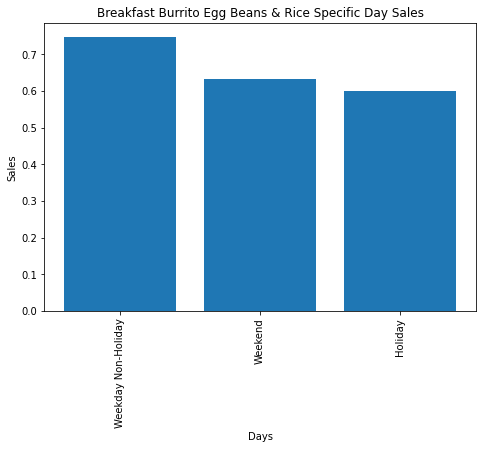

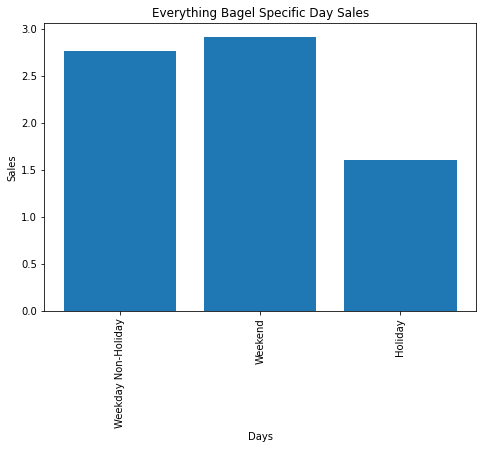

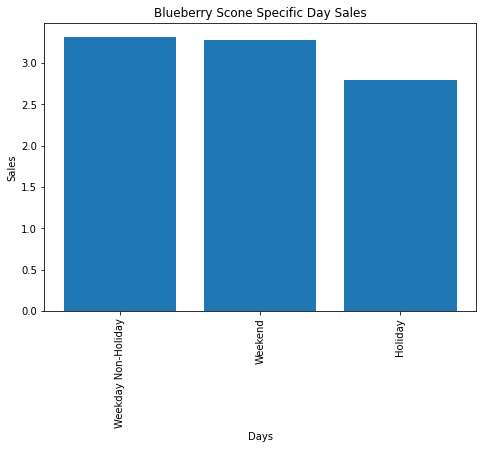

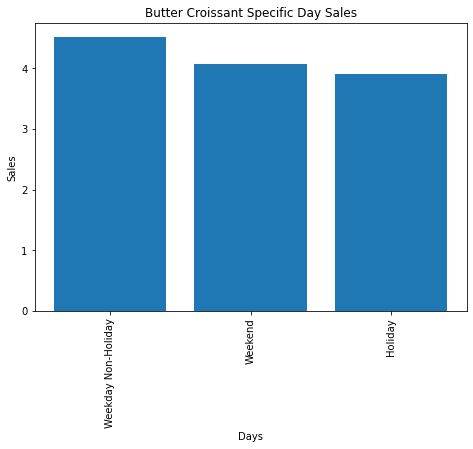

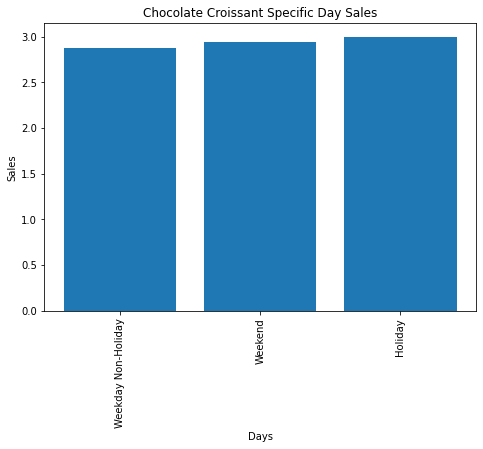

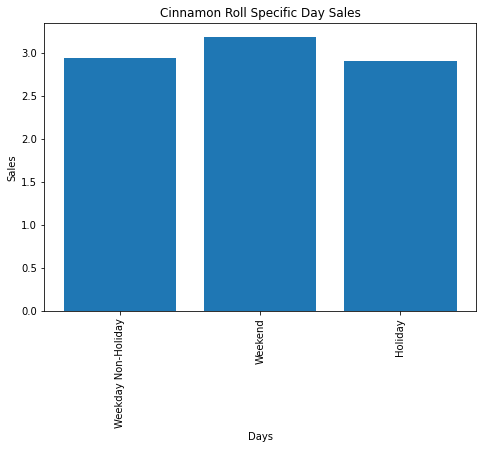

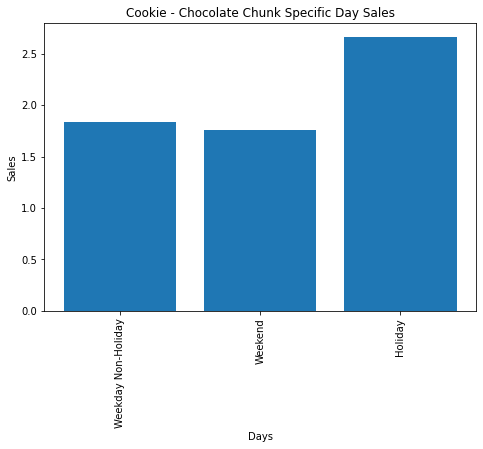

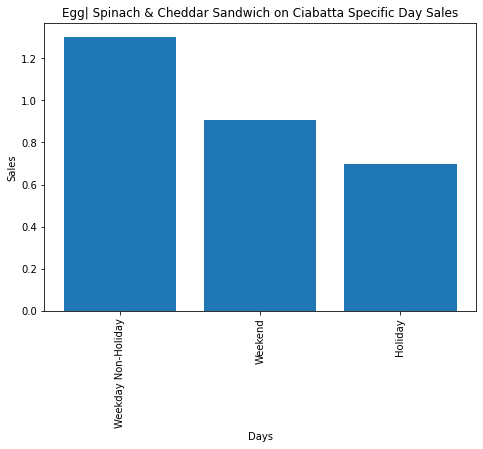

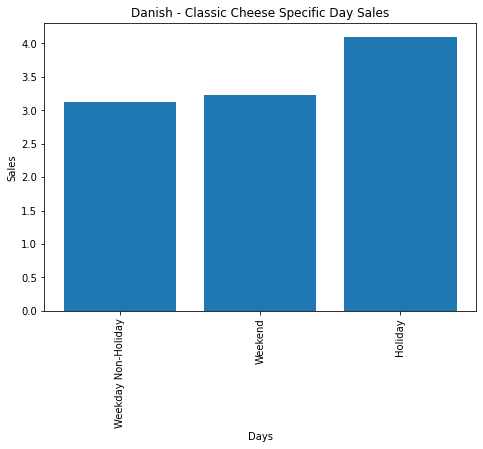

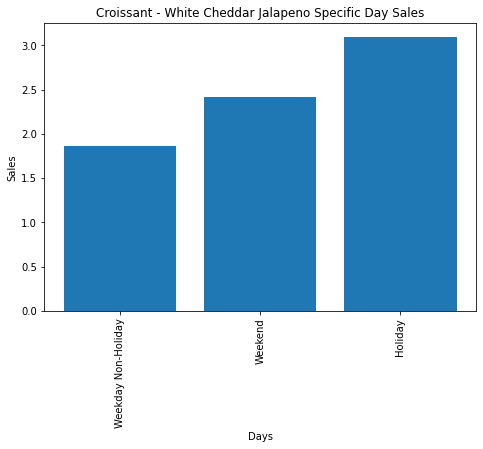

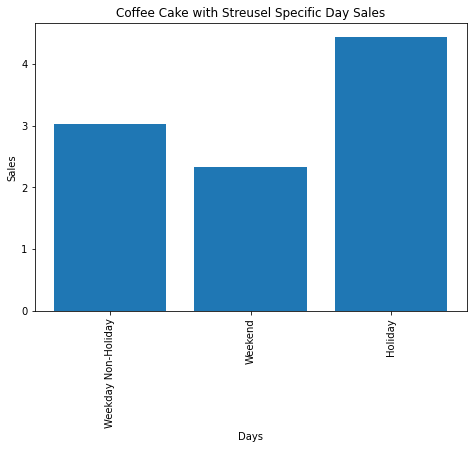

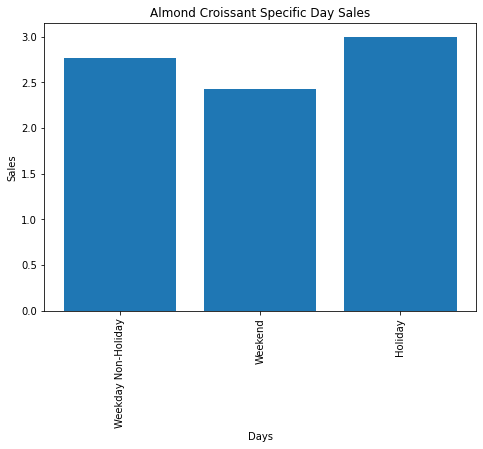

In [ ]:
special_day_impact(store117)

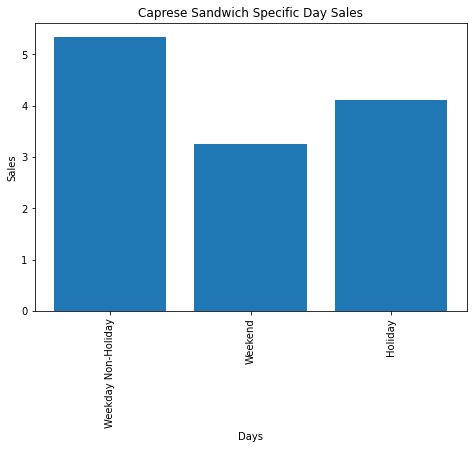

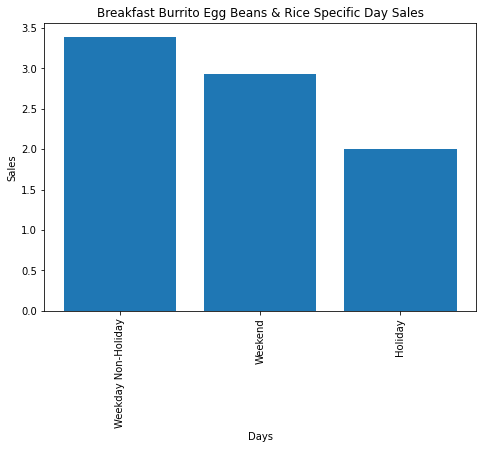

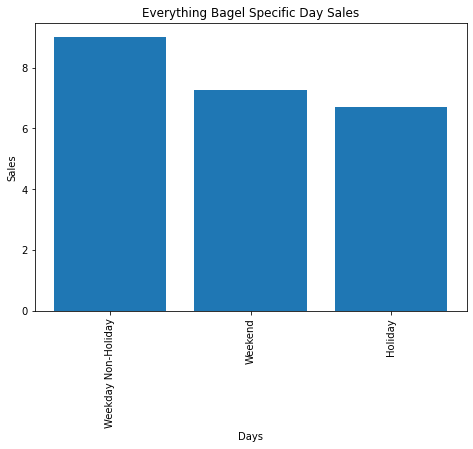

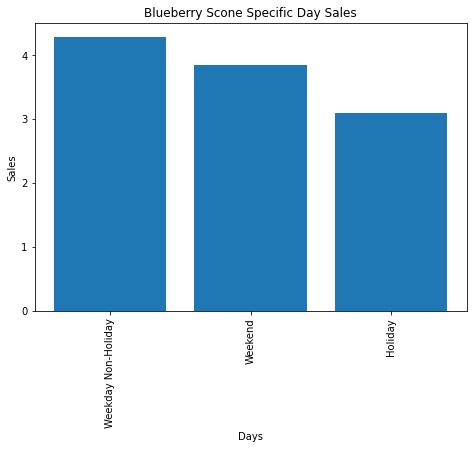

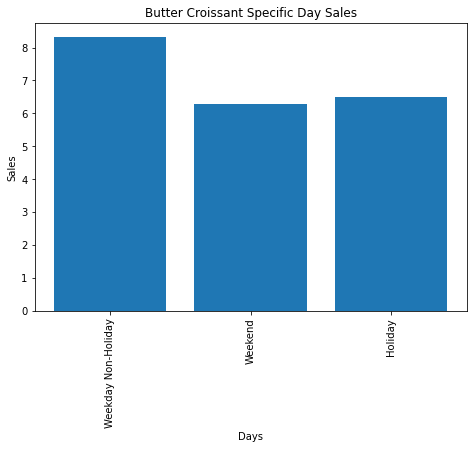

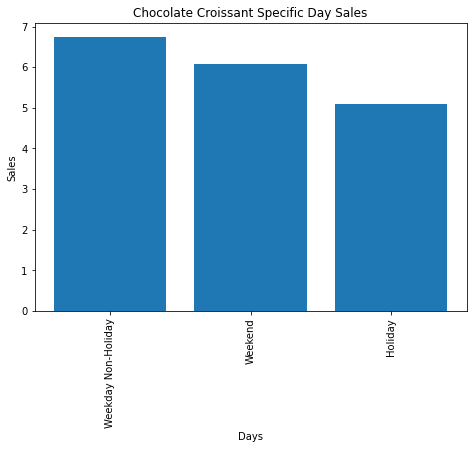

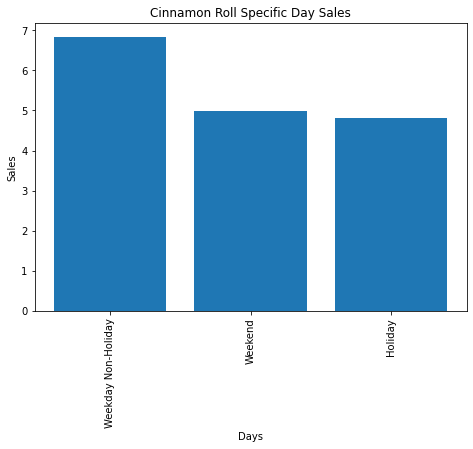

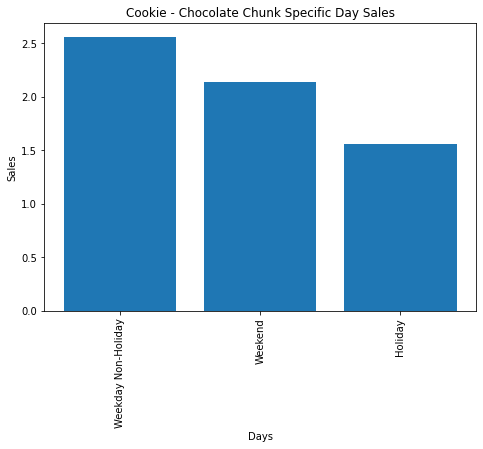

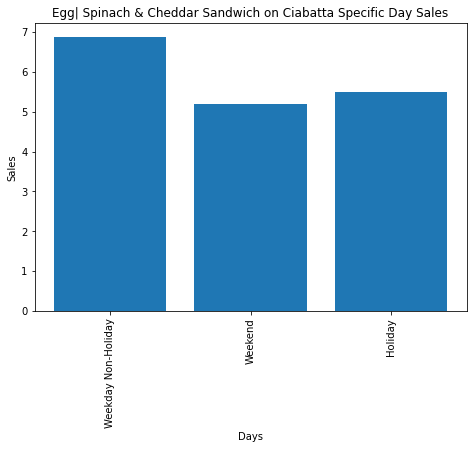

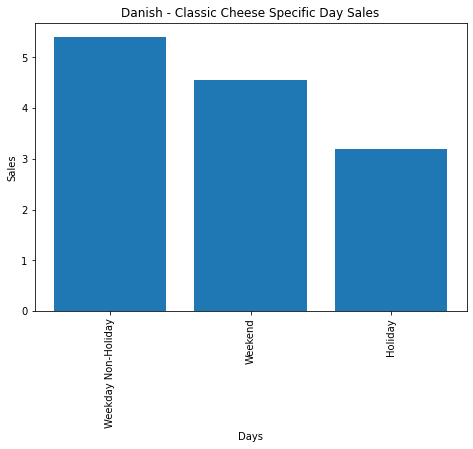

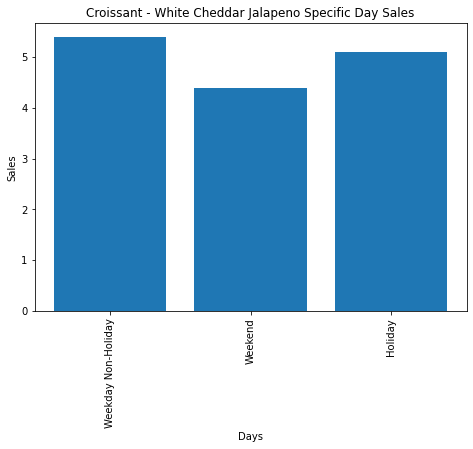

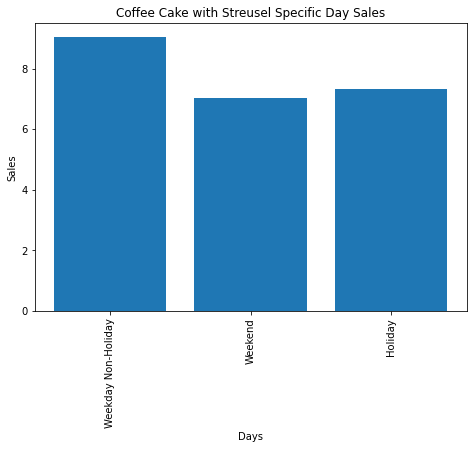

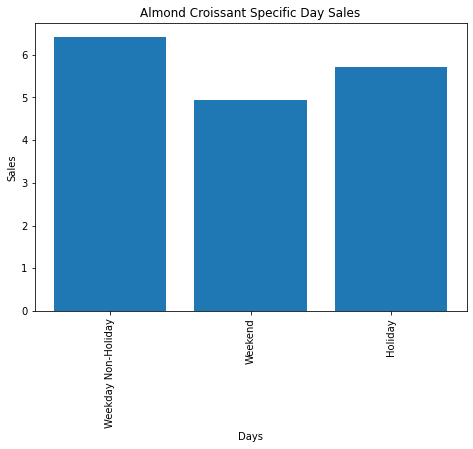

In [ ]:
special_day_impact(store332)

# Stocking Patterns

In [ ]:
# might be better to display this as a line graph of restocking items,
# sold items and missed sales over the course of the year


def stocking_patterns_frequency(df):

    store_ID = df['StoreID'].unique()[0]
    frequency = list()
    for product in df['Description'].unique():
        restock_streak_amounts = list()
        product_data =  df[df['Description'] == product]['LatestOrder']
        i = 0
        for data in product_data:
            if data == 0 :
                i += 1
            else:
                restock_streak_amounts.append(i)
                i = 0
        
        restock_streak_count = dict()
        for i in restock_streak_amounts:
            if i in restock_streak_count:
                restock_streak_count[i] += 1
            else:
                restock_streak_count[i] = 1
        restock_streak_count = dict(sorted(restock_streak_count.items()))
        frequency.append([product, restock_streak_count])
    print(f'{store_ID} Stocking Pattern' )
    for i in frequency:
        print("item: ",  i[0])
        print()
        print("Restocking Streak, Frequency")
        for key, value in i[1].items():
            print(key, "\t\t  ", value)
        print("\n")

In [ ]:
stocking_patterns_frequency(store18)

18 Stocking Pattern
item:  Caprese Sandwich

Restocking Streak, Frequency
0 		   210
1 		   45
2 		   11
3 		   7
5 		   1


item:  Breakfast Burrito Egg Beans & Rice

Restocking Streak, Frequency
0 		   211
1 		   48
2 		   10
3 		   5
4 		   2


item:  Everything Bagel

Restocking Streak, Frequency
0 		   326
1 		   15
2 		   1
3 		   2


item:  Blueberry Scone

Restocking Streak, Frequency
0 		   354
1 		   5
2 		   1


item:  Butter Croissant

Restocking Streak, Frequency
0 		   344
1 		   7
2 		   3


item:  Chocolate Croissant

Restocking Streak, Frequency
0 		   345
1 		   9
2 		   1


item:  Cinnamon Roll

Restocking Streak, Frequency
0 		   320
1 		   19
2 		   3


item:  Cookie - Chocolate Chunk

Restocking Streak, Frequency
0 		   62
1 		   18
2 		   19
3 		   14
4 		   4
5 		   4
9 		   1
47 		   1


item:  Egg| Spinach & Cheddar Sandwich on Ciabatta

Restocking Streak, Frequency
0 		   302
1 		   29
2 		   1
3 		   1


item:  Danish - Classic Cheese

Restocking Streak, Fre

In [ ]:
stocking_patterns_frequency(store117)

117 Stocking Pattern
item:  Caprese Sandwich

Restocking Streak, Frequency
0 		   180
1 		   54
2 		   14
3 		   8
4 		   1


item:  Breakfast Burrito Egg Beans & Rice

Restocking Streak, Frequency
0 		   95
1 		   45
2 		   18
3 		   9
4 		   3
5 		   4
7 		   5
11 		   1


item:  Everything Bagel

Restocking Streak, Frequency
0 		   310
1 		   18
2 		   7


item:  Blueberry Scone

Restocking Streak, Frequency
0 		   335
1 		   13
2 		   2


item:  Butter Croissant

Restocking Streak, Frequency
0 		   348
1 		   8
2 		   1


item:  Chocolate Croissant

Restocking Streak, Frequency
0 		   315
1 		   21
2 		   2
3 		   1


item:  Cinnamon Roll

Restocking Streak, Frequency
0 		   319
1 		   17
2 		   2
3 		   2


item:  Cookie - Chocolate Chunk

Restocking Streak, Frequency
0 		   201
1 		   30
2 		   7
3 		   2
5 		   1
43 		   1


item:  Egg| Spinach & Cheddar Sandwich on Ciabatta

Restocking Streak, Frequency
0 		   173
1 		   54
2 		   17
3 		   5
4 		   3


item:  Danish - Classic 

In [ ]:
stocking_patterns_frequency(store332 )

332 Stocking Pattern
item:  Caprese Sandwich

Restocking Streak, Frequency
0 		   343
1 		   12


item:  Breakfast Burrito Egg Beans & Rice

Restocking Streak, Frequency
0 		   304
1 		   30
2 		   1


item:  Everything Bagel

Restocking Streak, Frequency
0 		   358
1 		   4


item:  Blueberry Scone

Restocking Streak, Frequency
0 		   346
1 		   9
2 		   1


item:  Butter Croissant

Restocking Streak, Frequency
0 		   365
1 		   1


item:  Chocolate Croissant

Restocking Streak, Frequency
0 		   359
1 		   4


item:  Cinnamon Roll

Restocking Streak, Frequency
0 		   361
1 		   3


item:  Cookie - Chocolate Chunk

Restocking Streak, Frequency
0 		   245
1 		   18
2 		   2
3 		   1
4 		   1
43 		   1


item:  Egg| Spinach & Cheddar Sandwich on Ciabatta

Restocking Streak, Frequency
0 		   359
1 		   4


item:  Danish - Classic Cheese

Restocking Streak, Frequency
0 		   355
1 		   6


item:  Croissant - White Cheddar Jalapeno

Restocking Streak, Frequency
0 		   365
1 		   1


item:  C